# Covid-19-Trend-Predictor

In [104]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [105]:
# data
df = pd.read_csv('../Timeseries-Data/timeseries_data.csv')
columns_to_keep = ['Date','Index','Location','Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df = df.astype({"Population_Density":float ,"Lockdown": float,'Num_Cases':float})
df = df[columns_to_keep]
numeric_columns = ['Population_Density','Lockdown','Max_Temp','Min_Temp','Num_Cases']
df_numeric = df[numeric_columns]
df_temp = df[['Min_Temp','Max_Temp']]
final_temp = []
df_numeric.head()
print('Min', np.min(df_numeric))
print('Max', np.max(df_numeric))
dataset = df_numeric.astype('float64')
# scaling
scaler = MinMaxScaler(feature_range=(0.0, 1.0))
scaled_data = scaler.fit_transform(dataset)
temp_deno = (np.max(df['Max_Temp']) - np.min(df['Min_Temp']))
temp_num = np.min(df['Min_Temp'])
for ind in df['Index']:
    index = int(ind)
    df.at[index,'Population_Density'] = scaled_data[index][0]
    df.at[index,'Lockdown'] = scaled_data[index][1]
    df.at[index,'Min_Temp'] = (df.at[index,'Min_Temp'] - temp_num)/ temp_deno
    df.at[index,'Max_Temp'] = (df.at[index,'Max_Temp'] - temp_num)/ temp_deno
df = df.set_index("Date")
df_final = []
df_final.append(df[df.Location=='Australia'].reset_index(drop=True))
df_final.append(df[df.Location == 'India'].reset_index(drop=True))
df_final.append(df[df.Location == 'China'].reset_index(drop=True))
df_final.append(df[df.Location == 'USA'].reset_index(drop=True))
df_final.append(df[df.Location == 'Italy'].reset_index(drop=True))
df_final.append(df[df.Location == 'France'].reset_index(drop=True))
for df_temp in df_final:
    i=0
    for ind in df_temp['Index']:
        df_temp.at[i,'Index'] = i
        i+=1
    for ind in reversed(df_temp['Index']):
        i = int(ind)
        if i != 0:
            df_temp.at[i,'Num_Cases'] -= df_temp.at[i-1,'Num_Cases']
    df_temp['Num_Cases'] /= 1500
df_final[1]

Min Population_Density    9.0
Lockdown              0.0
Max_Temp              5.0
Min_Temp             -8.0
Num_Cases             0.0
dtype: float64
Max Population_Density      1202.0
Lockdown                 100.0
Max_Temp                  40.0
Min_Temp                  26.0
Num_Cases             187321.0
dtype: float64


,Index,Location,Population_Density,Min_Temp,Max_Temp,Lockdown,Num_Cases
0,0.0,India,1.0,0.479167,0.645833,0.0,0.000000
1,1.0,India,1.0,0.437500,0.583333,0.0,0.000000
2,2.0,India,1.0,0.416667,0.625000,0.0,0.000000
3,3.0,India,1.0,0.500000,0.625000,0.0,0.000000
4,4.0,India,1.0,0.458333,0.645833,0.0,0.000000
5,5.0,India,1.0,0.458333,0.645833,0.0,0.000000
6,6.0,India,1.0,0.479167,0.562500,0.0,0.000000
7,7.0,India,1.0,0.458333,0.625000,0.0,0.000000
8,8.0,India,1.0,0.458333,0.604167,0.0,0.000667
9,9.0,India,1.0,0.479167,0.604167,0.0,0.000000


In [ ]:
columns_input = ['Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']

for i in range(len(df_final)):
    df_final[i] = df_final[i][columns_input]

In [128]:
# df_India=df_India.set_index('Date')
columns_input = ['Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
# input_data = df_India[columns_input]
# output_data = df_India['Num_Cases']
# X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.304761, random_state = 1)
from pandas import DataFrame
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
df_India = df_final[1][columns_input]
new_df_India = series_to_supervised(df_India,7,1,True)
# new_df.drop(new_df.columns[[-2,-3,-4,-5]], axis=1, inplace=True)

df_China = series_to_supervised(df_final[2],7,1,True)
df_Australia = series_to_supervised(df_final[0],7,1,True)
df_USA= series_to_supervised(df_final[3],7,1,True)
df_Italy=series_to_supervised(df_final[4],7,1,True)
df_France=series_to_supervised(df_final[5],7,1,True)
new_df_India

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
7,1.0,0.479167,0.645833,0.0,0.000000,1.0,0.437500,0.583333,0.0,0.000000,...,1.0,0.479167,0.562500,0.0,0.000000,1.0,0.458333,0.625000,0.0,0.000000
8,1.0,0.437500,0.583333,0.0,0.000000,1.0,0.416667,0.625000,0.0,0.000000,...,1.0,0.458333,0.625000,0.0,0.000000,1.0,0.458333,0.604167,0.0,0.000667
9,1.0,0.416667,0.625000,0.0,0.000000,1.0,0.500000,0.625000,0.0,0.000000,...,1.0,0.458333,0.604167,0.0,0.000667,1.0,0.479167,0.604167,0.0,0.000000
10,1.0,0.500000,0.625000,0.0,0.000000,1.0,0.458333,0.645833,0.0,0.000000,...,1.0,0.479167,0.604167,0.0,0.000000,1.0,0.458333,0.604167,0.0,0.000000
11,1.0,0.458333,0.645833,0.0,0.000000,1.0,0.458333,0.645833,0.0,0.000000,...,1.0,0.458333,0.604167,0.0,0.000000,1.0,0.479167,0.645833,0.0,0.000667
12,1.0,0.458333,0.645833,0.0,0.000000,1.0,0.479167,0.562500,0.0,0.000000,...,1.0,0.479167,0.645833,0.0,0.000667,1.0,0.479167,0.687500,0.0,0.000667
13,1.0,0.479167,0.562500,0.0,0.000000,1.0,0.458333,0.625000,0.0,0.000000,...,1.0,0.479167,0.687500,0.0,0.000667,1.0,0.500000,0.625000,0.0,0.000000
14,1.0,0.458333,0.625000,0.0,0.000000,1.0,0.458333,0.604167,0.0,0.000667,...,1.0,0.500000,0.625000,0.0,0.000000,1.0,0.458333,0.645833,0.0,0.000000
15,1.0,0.458333,0.604167,0.0,0.000667,1.0,0.479167,0.604167,0.0,0.000000,...,1.0,0.458333,0.645833,0.0,0.000000,1.0,0.479167,0.666667,0.0,0.000000
16,1.0,0.479167,0.604167,0.0,0.000000,1.0,0.458333,0.604167,0.0,0.000000,...,1.0,0.479167,0.666667,0.0,0.000000,1.0,0.458333,0.625000,0.0,0.000000


In [129]:
from numpy import concatenate
values = df_Australia.values
train = values[:,:]
test = values[15:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
batch_size=72
history = model.fit(train_X, train_y, epochs=100, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = df_China.values
train = values[:,:]
test = values[15:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=100, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = df_France.values
train = values[:,:]
test = values[15:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=100, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = df_USA.values
train = values[:,:]
test = values[5:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=100, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = df_Italy.values
train = values[:,:]
test = values[10:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=100, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# # fit network
values = new_df_India.values
train = values[:,:]
test = values[7:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
history = model.fit(train_X, train_y, epochs=10000, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 50)                18000     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 18,051
Trainable params: 18,051
Non-trainable params: 0
_________________________________________________________________
Train on 63 samples, validate on 48 samples
Epoch 1/100
 - 0s - loss: 0.0255 - val_loss: 0.0188
Epoch 2/100
 - 0s - loss: 0.0196 - val_loss: 0.0155
Epoch 3/100
 - 0s - loss: 0.0152 - val_loss: 0.0133
Epoch 4/100
 - 0s - loss: 0.0121 - val_loss: 0.0121
Epoch 5/100
 - 0s - loss: 0.0102 - val_loss: 0.0115
Epoch 6/100
 - 0s - loss: 0.0092 - val_loss: 0.0112
Epoch 7/100
 - 0s - loss: 0.0087 - val_loss: 0.0110
Epoch 8/100
 - 0s - loss: 0.0084 - val_loss: 0.0106
Epoch 9/100
 - 0s - loss: 0.0081 - val_loss: 0.0099

Epoch 43/100
 - 0s - loss: 1.3140 - val_loss: 1.5499
Epoch 44/100
 - 0s - loss: 1.3095 - val_loss: 1.5423
Epoch 45/100
 - 0s - loss: 1.3049 - val_loss: 1.5342
Epoch 46/100
 - 0s - loss: 1.3001 - val_loss: 1.5259
Epoch 47/100
 - 0s - loss: 1.2955 - val_loss: 1.5175
Epoch 48/100
 - 0s - loss: 1.2912 - val_loss: 1.5094
Epoch 49/100
 - 0s - loss: 1.2871 - val_loss: 1.5016
Epoch 50/100
 - 0s - loss: 1.2832 - val_loss: 1.4942
Epoch 51/100
 - 0s - loss: 1.2796 - val_loss: 1.4873
Epoch 52/100
 - 0s - loss: 1.2759 - val_loss: 1.4809
Epoch 53/100
 - 0s - loss: 1.2722 - val_loss: 1.4751
Epoch 54/100
 - 0s - loss: 1.2683 - val_loss: 1.4697
Epoch 55/100
 - 0s - loss: 1.2643 - val_loss: 1.4648
Epoch 56/100
 - 0s - loss: 1.2602 - val_loss: 1.4603
Epoch 57/100
 - 0s - loss: 1.2561 - val_loss: 1.4562
Epoch 58/100
 - 0s - loss: 1.2521 - val_loss: 1.4523
Epoch 59/100
 - 0s - loss: 1.2481 - val_loss: 1.4484
Epoch 60/100
 - 0s - loss: 1.2442 - val_loss: 1.4444
Epoch 61/100
 - 0s - loss: 1.2403 - val_loss: 

Epoch 97/100
 - 0s - loss: 0.0374 - val_loss: 0.0482
Epoch 98/100
 - 0s - loss: 0.0370 - val_loss: 0.0476
Epoch 99/100
 - 0s - loss: 0.0366 - val_loss: 0.0471
Epoch 100/100
 - 0s - loss: 0.0362 - val_loss: 0.0466
Train on 63 samples, validate on 58 samples
Epoch 1/100
 - 0s - loss: 11.8057 - val_loss: 11.8978
Epoch 2/100
 - 0s - loss: 10.9538 - val_loss: 10.7173
Epoch 3/100
 - 0s - loss: 9.8676 - val_loss: 9.4618
Epoch 4/100
 - 0s - loss: 8.7130 - val_loss: 8.2356
Epoch 5/100
 - 0s - loss: 7.5859 - val_loss: 7.1006
Epoch 6/100
 - 0s - loss: 6.5432 - val_loss: 6.0807
Epoch 7/100
 - 0s - loss: 5.6063 - val_loss: 5.1837
Epoch 8/100
 - 0s - loss: 4.7820 - val_loss: 4.4090
Epoch 9/100
 - 0s - loss: 4.0695 - val_loss: 3.7470
Epoch 10/100
 - 0s - loss: 3.4598 - val_loss: 3.1857
Epoch 11/100
 - 0s - loss: 2.9419 - val_loss: 2.7156
Epoch 12/100
 - 0s - loss: 2.5072 - val_loss: 2.3295
Epoch 13/100
 - 0s - loss: 2.1496 - val_loss: 2.0160
Epoch 14/100
 - 0s - loss: 1.8590 - val_loss: 1.7675
Epoch 

 - 0s - loss: 0.1948 - val_loss: 0.2284
Epoch 51/100
 - 0s - loss: 0.1924 - val_loss: 0.2249
Epoch 52/100
 - 0s - loss: 0.1894 - val_loss: 0.2211
Epoch 53/100
 - 0s - loss: 0.1863 - val_loss: 0.2174
Epoch 54/100
 - 0s - loss: 0.1832 - val_loss: 0.2140
Epoch 55/100
 - 0s - loss: 0.1803 - val_loss: 0.2110
Epoch 56/100
 - 0s - loss: 0.1779 - val_loss: 0.2086
Epoch 57/100
 - 0s - loss: 0.1758 - val_loss: 0.2066
Epoch 58/100
 - 0s - loss: 0.1742 - val_loss: 0.2051
Epoch 59/100
 - 0s - loss: 0.1729 - val_loss: 0.2038
Epoch 60/100
 - 0s - loss: 0.1717 - val_loss: 0.2026
Epoch 61/100
 - 0s - loss: 0.1707 - val_loss: 0.2015
Epoch 62/100
 - 0s - loss: 0.1698 - val_loss: 0.2005
Epoch 63/100
 - 0s - loss: 0.1689 - val_loss: 0.1995
Epoch 64/100
 - 0s - loss: 0.1680 - val_loss: 0.1985
Epoch 65/100
 - 0s - loss: 0.1671 - val_loss: 0.1977
Epoch 66/100
 - 0s - loss: 0.1664 - val_loss: 0.1969
Epoch 67/100
 - 0s - loss: 0.1657 - val_loss: 0.1962
Epoch 68/100
 - 0s - loss: 0.1652 - val_loss: 0.1957
Epoch 

Epoch 93/10000
 - 0s - loss: 7.6519e-04 - val_loss: 8.1625e-04
Epoch 94/10000
 - 0s - loss: 7.6439e-04 - val_loss: 8.1542e-04
Epoch 95/10000
 - 0s - loss: 7.6330e-04 - val_loss: 8.1350e-04
Epoch 96/10000
 - 0s - loss: 7.6179e-04 - val_loss: 8.1077e-04
Epoch 97/10000
 - 0s - loss: 7.6003e-04 - val_loss: 8.0771e-04
Epoch 98/10000
 - 0s - loss: 7.5830e-04 - val_loss: 8.0476e-04
Epoch 99/10000
 - 0s - loss: 7.5681e-04 - val_loss: 8.0221e-04
Epoch 100/10000
 - 0s - loss: 7.5561e-04 - val_loss: 8.0013e-04
Epoch 101/10000
 - 0s - loss: 7.5457e-04 - val_loss: 7.9844e-04
Epoch 102/10000
 - 0s - loss: 7.5349e-04 - val_loss: 7.9707e-04
Epoch 103/10000
 - 0s - loss: 7.5226e-04 - val_loss: 7.9596e-04
Epoch 104/10000
 - 0s - loss: 7.5086e-04 - val_loss: 7.9512e-04
Epoch 105/10000
 - 0s - loss: 7.4938e-04 - val_loss: 7.9453e-04
Epoch 106/10000
 - 0s - loss: 7.4795e-04 - val_loss: 7.9410e-04
Epoch 107/10000
 - 0s - loss: 7.4665e-04 - val_loss: 7.9368e-04
Epoch 108/10000
 - 0s - loss: 7.4547e-04 - val_

Epoch 222/10000
 - 0s - loss: 6.2822e-04 - val_loss: 6.7213e-04
Epoch 223/10000
 - 0s - loss: 6.2737e-04 - val_loss: 6.7127e-04
Epoch 224/10000
 - 0s - loss: 6.2652e-04 - val_loss: 6.7041e-04
Epoch 225/10000
 - 0s - loss: 6.2568e-04 - val_loss: 6.6955e-04
Epoch 226/10000
 - 0s - loss: 6.2484e-04 - val_loss: 6.6870e-04
Epoch 227/10000
 - 0s - loss: 6.2400e-04 - val_loss: 6.6785e-04
Epoch 228/10000
 - 0s - loss: 6.2317e-04 - val_loss: 6.6700e-04
Epoch 229/10000
 - 0s - loss: 6.2233e-04 - val_loss: 6.6615e-04
Epoch 230/10000
 - 0s - loss: 6.2150e-04 - val_loss: 6.6531e-04
Epoch 231/10000
 - 0s - loss: 6.2068e-04 - val_loss: 6.6446e-04
Epoch 232/10000
 - 0s - loss: 6.1985e-04 - val_loss: 6.6362e-04
Epoch 233/10000
 - 0s - loss: 6.1903e-04 - val_loss: 6.6278e-04
Epoch 234/10000
 - 0s - loss: 6.1821e-04 - val_loss: 6.6195e-04
Epoch 235/10000
 - 0s - loss: 6.1739e-04 - val_loss: 6.6111e-04
Epoch 236/10000
 - 0s - loss: 6.1657e-04 - val_loss: 6.6028e-04
Epoch 237/10000
 - 0s - loss: 6.1576e-04

Epoch 351/10000
 - 0s - loss: 5.3584e-04 - val_loss: 5.7766e-04
Epoch 352/10000
 - 0s - loss: 5.3524e-04 - val_loss: 5.7704e-04
Epoch 353/10000
 - 0s - loss: 5.3463e-04 - val_loss: 5.7641e-04
Epoch 354/10000
 - 0s - loss: 5.3402e-04 - val_loss: 5.7579e-04
Epoch 355/10000
 - 0s - loss: 5.3342e-04 - val_loss: 5.7516e-04
Epoch 356/10000
 - 0s - loss: 5.3282e-04 - val_loss: 5.7454e-04
Epoch 357/10000
 - 0s - loss: 5.3221e-04 - val_loss: 5.7392e-04
Epoch 358/10000
 - 0s - loss: 5.3161e-04 - val_loss: 5.7330e-04
Epoch 359/10000
 - 0s - loss: 5.3102e-04 - val_loss: 5.7268e-04
Epoch 360/10000
 - 0s - loss: 5.3042e-04 - val_loss: 5.7206e-04
Epoch 361/10000
 - 0s - loss: 5.2982e-04 - val_loss: 5.7144e-04
Epoch 362/10000
 - 0s - loss: 5.2922e-04 - val_loss: 5.7083e-04
Epoch 363/10000
 - 0s - loss: 5.2863e-04 - val_loss: 5.7021e-04
Epoch 364/10000
 - 0s - loss: 5.2804e-04 - val_loss: 5.6960e-04
Epoch 365/10000
 - 0s - loss: 5.2745e-04 - val_loss: 5.6899e-04
Epoch 366/10000
 - 0s - loss: 5.2686e-04

 - 0s - loss: 4.6690e-04 - val_loss: 5.0573e-04
Epoch 480/10000
 - 0s - loss: 4.6643e-04 - val_loss: 5.0522e-04
Epoch 481/10000
 - 0s - loss: 4.6595e-04 - val_loss: 5.0471e-04
Epoch 482/10000
 - 0s - loss: 4.6547e-04 - val_loss: 5.0421e-04
Epoch 483/10000
 - 0s - loss: 4.6499e-04 - val_loss: 5.0370e-04
Epoch 484/10000
 - 0s - loss: 4.6451e-04 - val_loss: 5.0320e-04
Epoch 485/10000
 - 0s - loss: 4.6404e-04 - val_loss: 5.0269e-04
Epoch 486/10000
 - 0s - loss: 4.6356e-04 - val_loss: 5.0219e-04
Epoch 487/10000
 - 0s - loss: 4.6308e-04 - val_loss: 5.0169e-04
Epoch 488/10000
 - 0s - loss: 4.6261e-04 - val_loss: 5.0119e-04
Epoch 489/10000
 - 0s - loss: 4.6214e-04 - val_loss: 5.0069e-04
Epoch 490/10000
 - 0s - loss: 4.6166e-04 - val_loss: 5.0019e-04
Epoch 491/10000
 - 0s - loss: 4.6119e-04 - val_loss: 4.9969e-04
Epoch 492/10000
 - 0s - loss: 4.6072e-04 - val_loss: 4.9919e-04
Epoch 493/10000
 - 0s - loss: 4.6025e-04 - val_loss: 4.9869e-04
Epoch 494/10000
 - 0s - loss: 4.5978e-04 - val_loss: 4.9

Epoch 608/10000
 - 0s - loss: 4.1029e-04 - val_loss: 4.4535e-04
Epoch 609/10000
 - 0s - loss: 4.0989e-04 - val_loss: 4.4492e-04
Epoch 610/10000
 - 0s - loss: 4.0948e-04 - val_loss: 4.4448e-04
Epoch 611/10000
 - 0s - loss: 4.0908e-04 - val_loss: 4.4405e-04
Epoch 612/10000
 - 0s - loss: 4.0868e-04 - val_loss: 4.4362e-04
Epoch 613/10000
 - 0s - loss: 4.0828e-04 - val_loss: 4.4319e-04
Epoch 614/10000
 - 0s - loss: 4.0788e-04 - val_loss: 4.4276e-04
Epoch 615/10000
 - 0s - loss: 4.0748e-04 - val_loss: 4.4233e-04
Epoch 616/10000
 - 0s - loss: 4.0708e-04 - val_loss: 4.4190e-04
Epoch 617/10000
 - 0s - loss: 4.0668e-04 - val_loss: 4.4147e-04
Epoch 618/10000
 - 0s - loss: 4.0628e-04 - val_loss: 4.4104e-04
Epoch 619/10000
 - 0s - loss: 4.0589e-04 - val_loss: 4.4061e-04
Epoch 620/10000
 - 0s - loss: 4.0549e-04 - val_loss: 4.4018e-04
Epoch 621/10000
 - 0s - loss: 4.0509e-04 - val_loss: 4.3975e-04
Epoch 622/10000
 - 0s - loss: 4.0470e-04 - val_loss: 4.3933e-04
Epoch 623/10000
 - 0s - loss: 4.0430e-04

 - 0s - loss: 3.6235e-04 - val_loss: 3.9346e-04
Epoch 737/10000
 - 0s - loss: 3.6200e-04 - val_loss: 3.9308e-04
Epoch 738/10000
 - 0s - loss: 3.6165e-04 - val_loss: 3.9270e-04
Epoch 739/10000
 - 0s - loss: 3.6130e-04 - val_loss: 3.9232e-04
Epoch 740/10000
 - 0s - loss: 3.6096e-04 - val_loss: 3.9194e-04
Epoch 741/10000
 - 0s - loss: 3.6061e-04 - val_loss: 3.9157e-04
Epoch 742/10000
 - 0s - loss: 3.6026e-04 - val_loss: 3.9119e-04
Epoch 743/10000
 - 0s - loss: 3.5992e-04 - val_loss: 3.9081e-04
Epoch 744/10000
 - 0s - loss: 3.5957e-04 - val_loss: 3.9044e-04
Epoch 745/10000
 - 0s - loss: 3.5923e-04 - val_loss: 3.9006e-04
Epoch 746/10000
 - 0s - loss: 3.5888e-04 - val_loss: 3.8968e-04
Epoch 747/10000
 - 0s - loss: 3.5854e-04 - val_loss: 3.8931e-04
Epoch 748/10000
 - 0s - loss: 3.5819e-04 - val_loss: 3.8893e-04
Epoch 749/10000
 - 0s - loss: 3.5785e-04 - val_loss: 3.8856e-04
Epoch 750/10000
 - 0s - loss: 3.5751e-04 - val_loss: 3.8818e-04
Epoch 751/10000
 - 0s - loss: 3.5716e-04 - val_loss: 3.8

Epoch 865/10000
 - 0s - loss: 3.2036e-04 - val_loss: 3.4764e-04
Epoch 866/10000
 - 0s - loss: 3.2006e-04 - val_loss: 3.4731e-04
Epoch 867/10000
 - 0s - loss: 3.1976e-04 - val_loss: 3.4698e-04
Epoch 868/10000
 - 0s - loss: 3.1945e-04 - val_loss: 3.4665e-04
Epoch 869/10000
 - 0s - loss: 3.1915e-04 - val_loss: 3.4632e-04
Epoch 870/10000
 - 0s - loss: 3.1885e-04 - val_loss: 3.4599e-04
Epoch 871/10000
 - 0s - loss: 3.1855e-04 - val_loss: 3.4566e-04
Epoch 872/10000
 - 0s - loss: 3.1825e-04 - val_loss: 3.4533e-04
Epoch 873/10000
 - 0s - loss: 3.1795e-04 - val_loss: 3.4500e-04
Epoch 874/10000
 - 0s - loss: 3.1765e-04 - val_loss: 3.4467e-04
Epoch 875/10000
 - 0s - loss: 3.1734e-04 - val_loss: 3.4434e-04
Epoch 876/10000
 - 0s - loss: 3.1704e-04 - val_loss: 3.4401e-04
Epoch 877/10000
 - 0s - loss: 3.1674e-04 - val_loss: 3.4369e-04
Epoch 878/10000
 - 0s - loss: 3.1645e-04 - val_loss: 3.4336e-04
Epoch 879/10000
 - 0s - loss: 3.1615e-04 - val_loss: 3.4303e-04
Epoch 880/10000
 - 0s - loss: 3.1585e-04

Epoch 994/10000
 - 0s - loss: 2.8387e-04 - val_loss: 3.0769e-04
Epoch 995/10000
 - 0s - loss: 2.8361e-04 - val_loss: 3.0740e-04
Epoch 996/10000
 - 0s - loss: 2.8334e-04 - val_loss: 3.0711e-04
Epoch 997/10000
 - 0s - loss: 2.8308e-04 - val_loss: 3.0682e-04
Epoch 998/10000
 - 0s - loss: 2.8282e-04 - val_loss: 3.0654e-04
Epoch 999/10000
 - 0s - loss: 2.8256e-04 - val_loss: 3.0625e-04
Epoch 1000/10000
 - 0s - loss: 2.8230e-04 - val_loss: 3.0596e-04
Epoch 1001/10000
 - 0s - loss: 2.8204e-04 - val_loss: 3.0568e-04
Epoch 1002/10000
 - 0s - loss: 2.8177e-04 - val_loss: 3.0539e-04
Epoch 1003/10000
 - 0s - loss: 2.8151e-04 - val_loss: 3.0511e-04
Epoch 1004/10000
 - 0s - loss: 2.8125e-04 - val_loss: 3.0482e-04
Epoch 1005/10000
 - 0s - loss: 2.8099e-04 - val_loss: 3.0454e-04
Epoch 1006/10000
 - 0s - loss: 2.8074e-04 - val_loss: 3.0425e-04
Epoch 1007/10000
 - 0s - loss: 2.8048e-04 - val_loss: 3.0397e-04
Epoch 1008/10000
 - 0s - loss: 2.8022e-04 - val_loss: 3.0369e-04
Epoch 1009/10000
 - 0s - loss: 

 - 0s - loss: 2.5305e-04 - val_loss: 2.7392e-04
Epoch 1121/10000
 - 0s - loss: 2.5282e-04 - val_loss: 2.7368e-04
Epoch 1122/10000
 - 0s - loss: 2.5260e-04 - val_loss: 2.7343e-04
Epoch 1123/10000
 - 0s - loss: 2.5237e-04 - val_loss: 2.7318e-04
Epoch 1124/10000
 - 0s - loss: 2.5215e-04 - val_loss: 2.7293e-04
Epoch 1125/10000
 - 0s - loss: 2.5192e-04 - val_loss: 2.7269e-04
Epoch 1126/10000
 - 0s - loss: 2.5170e-04 - val_loss: 2.7244e-04
Epoch 1127/10000
 - 0s - loss: 2.5147e-04 - val_loss: 2.7219e-04
Epoch 1128/10000
 - 0s - loss: 2.5125e-04 - val_loss: 2.7195e-04
Epoch 1129/10000
 - 0s - loss: 2.5102e-04 - val_loss: 2.7170e-04
Epoch 1130/10000
 - 0s - loss: 2.5080e-04 - val_loss: 2.7146e-04
Epoch 1131/10000
 - 0s - loss: 2.5057e-04 - val_loss: 2.7121e-04
Epoch 1132/10000
 - 0s - loss: 2.5035e-04 - val_loss: 2.7097e-04
Epoch 1133/10000
 - 0s - loss: 2.5013e-04 - val_loss: 2.7072e-04
Epoch 1134/10000
 - 0s - loss: 2.4990e-04 - val_loss: 2.7048e-04
Epoch 1135/10000
 - 0s - loss: 2.4968e-04 

Epoch 1247/10000
 - 0s - loss: 2.2641e-04 - val_loss: 2.4477e-04
Epoch 1248/10000
 - 0s - loss: 2.2622e-04 - val_loss: 2.4456e-04
Epoch 1249/10000
 - 0s - loss: 2.2603e-04 - val_loss: 2.4435e-04
Epoch 1250/10000
 - 0s - loss: 2.2583e-04 - val_loss: 2.4414e-04
Epoch 1251/10000
 - 0s - loss: 2.2564e-04 - val_loss: 2.4393e-04
Epoch 1252/10000
 - 0s - loss: 2.2545e-04 - val_loss: 2.4372e-04
Epoch 1253/10000
 - 0s - loss: 2.2526e-04 - val_loss: 2.4351e-04
Epoch 1254/10000
 - 0s - loss: 2.2507e-04 - val_loss: 2.4330e-04
Epoch 1255/10000
 - 0s - loss: 2.2487e-04 - val_loss: 2.4309e-04
Epoch 1256/10000
 - 0s - loss: 2.2468e-04 - val_loss: 2.4288e-04
Epoch 1257/10000
 - 0s - loss: 2.2449e-04 - val_loss: 2.4267e-04
Epoch 1258/10000
 - 0s - loss: 2.2430e-04 - val_loss: 2.4246e-04
Epoch 1259/10000
 - 0s - loss: 2.2411e-04 - val_loss: 2.4226e-04
Epoch 1260/10000
 - 0s - loss: 2.2392e-04 - val_loss: 2.4205e-04
Epoch 1261/10000
 - 0s - loss: 2.2373e-04 - val_loss: 2.4184e-04
Epoch 1262/10000
 - 0s - 

 - 0s - loss: 2.0395e-04 - val_loss: 2.2025e-04
Epoch 1374/10000
 - 0s - loss: 2.0379e-04 - val_loss: 2.2007e-04
Epoch 1375/10000
 - 0s - loss: 2.0363e-04 - val_loss: 2.1989e-04
Epoch 1376/10000
 - 0s - loss: 2.0346e-04 - val_loss: 2.1972e-04
Epoch 1377/10000
 - 0s - loss: 2.0330e-04 - val_loss: 2.1954e-04
Epoch 1378/10000
 - 0s - loss: 2.0314e-04 - val_loss: 2.1936e-04
Epoch 1379/10000
 - 0s - loss: 2.0298e-04 - val_loss: 2.1918e-04
Epoch 1380/10000
 - 0s - loss: 2.0281e-04 - val_loss: 2.1901e-04
Epoch 1381/10000
 - 0s - loss: 2.0265e-04 - val_loss: 2.1883e-04
Epoch 1382/10000
 - 0s - loss: 2.0249e-04 - val_loss: 2.1866e-04
Epoch 1383/10000
 - 0s - loss: 2.0233e-04 - val_loss: 2.1848e-04
Epoch 1384/10000
 - 0s - loss: 2.0217e-04 - val_loss: 2.1830e-04
Epoch 1385/10000
 - 0s - loss: 2.0200e-04 - val_loss: 2.1813e-04
Epoch 1386/10000
 - 0s - loss: 2.0184e-04 - val_loss: 2.1795e-04
Epoch 1387/10000
 - 0s - loss: 2.0168e-04 - val_loss: 2.1778e-04
Epoch 1388/10000
 - 0s - loss: 2.0152e-04 

Epoch 1500/10000
 - 0s - loss: 1.8487e-04 - val_loss: 1.9948e-04
Epoch 1501/10000
 - 0s - loss: 1.8473e-04 - val_loss: 1.9933e-04
Epoch 1502/10000
 - 0s - loss: 1.8459e-04 - val_loss: 1.9918e-04
Epoch 1503/10000
 - 0s - loss: 1.8446e-04 - val_loss: 1.9903e-04
Epoch 1504/10000
 - 0s - loss: 1.8432e-04 - val_loss: 1.9888e-04
Epoch 1505/10000
 - 0s - loss: 1.8418e-04 - val_loss: 1.9874e-04
Epoch 1506/10000
 - 0s - loss: 1.8405e-04 - val_loss: 1.9859e-04
Epoch 1507/10000
 - 0s - loss: 1.8391e-04 - val_loss: 1.9844e-04
Epoch 1508/10000
 - 0s - loss: 1.8377e-04 - val_loss: 1.9829e-04
Epoch 1509/10000
 - 0s - loss: 1.8364e-04 - val_loss: 1.9814e-04
Epoch 1510/10000
 - 0s - loss: 1.8350e-04 - val_loss: 1.9800e-04
Epoch 1511/10000
 - 0s - loss: 1.8337e-04 - val_loss: 1.9785e-04
Epoch 1512/10000
 - 0s - loss: 1.8323e-04 - val_loss: 1.9770e-04
Epoch 1513/10000
 - 0s - loss: 1.8310e-04 - val_loss: 1.9756e-04
Epoch 1514/10000
 - 0s - loss: 1.8296e-04 - val_loss: 1.9741e-04
Epoch 1515/10000
 - 0s - 

Epoch 1627/10000
 - 0s - loss: 1.6889e-04 - val_loss: 1.8215e-04
Epoch 1628/10000
 - 0s - loss: 1.6877e-04 - val_loss: 1.8203e-04
Epoch 1629/10000
 - 0s - loss: 1.6866e-04 - val_loss: 1.8191e-04
Epoch 1630/10000
 - 0s - loss: 1.6855e-04 - val_loss: 1.8178e-04
Epoch 1631/10000
 - 0s - loss: 1.6843e-04 - val_loss: 1.8166e-04
Epoch 1632/10000
 - 0s - loss: 1.6832e-04 - val_loss: 1.8154e-04
Epoch 1633/10000
 - 0s - loss: 1.6820e-04 - val_loss: 1.8141e-04
Epoch 1634/10000
 - 0s - loss: 1.6809e-04 - val_loss: 1.8129e-04
Epoch 1635/10000
 - 0s - loss: 1.6798e-04 - val_loss: 1.8117e-04
Epoch 1636/10000
 - 0s - loss: 1.6786e-04 - val_loss: 1.8104e-04
Epoch 1637/10000
 - 0s - loss: 1.6775e-04 - val_loss: 1.8092e-04
Epoch 1638/10000
 - 0s - loss: 1.6764e-04 - val_loss: 1.8080e-04
Epoch 1639/10000
 - 0s - loss: 1.6752e-04 - val_loss: 1.8068e-04
Epoch 1640/10000
 - 0s - loss: 1.6741e-04 - val_loss: 1.8055e-04
Epoch 1641/10000
 - 0s - loss: 1.6730e-04 - val_loss: 1.8043e-04
Epoch 1642/10000
 - 0s - 

 - 0s - loss: 1.5566e-04 - val_loss: 1.6787e-04
Epoch 1754/10000
 - 0s - loss: 1.5556e-04 - val_loss: 1.6777e-04
Epoch 1755/10000
 - 0s - loss: 1.5547e-04 - val_loss: 1.6766e-04
Epoch 1756/10000
 - 0s - loss: 1.5537e-04 - val_loss: 1.6756e-04
Epoch 1757/10000
 - 0s - loss: 1.5528e-04 - val_loss: 1.6746e-04
Epoch 1758/10000
 - 0s - loss: 1.5518e-04 - val_loss: 1.6736e-04
Epoch 1759/10000
 - 0s - loss: 1.5509e-04 - val_loss: 1.6725e-04
Epoch 1760/10000
 - 0s - loss: 1.5499e-04 - val_loss: 1.6715e-04
Epoch 1761/10000
 - 0s - loss: 1.5489e-04 - val_loss: 1.6705e-04
Epoch 1762/10000
 - 0s - loss: 1.5480e-04 - val_loss: 1.6695e-04
Epoch 1763/10000
 - 0s - loss: 1.5471e-04 - val_loss: 1.6685e-04
Epoch 1764/10000
 - 0s - loss: 1.5461e-04 - val_loss: 1.6675e-04
Epoch 1765/10000
 - 0s - loss: 1.5452e-04 - val_loss: 1.6664e-04
Epoch 1766/10000
 - 0s - loss: 1.5442e-04 - val_loss: 1.6654e-04
Epoch 1767/10000
 - 0s - loss: 1.5433e-04 - val_loss: 1.6644e-04
Epoch 1768/10000
 - 0s - loss: 1.5424e-04 

Epoch 1880/10000
 - 0s - loss: 1.4454e-04 - val_loss: 1.5593e-04
Epoch 1881/10000
 - 0s - loss: 1.4446e-04 - val_loss: 1.5584e-04
Epoch 1882/10000
 - 0s - loss: 1.4438e-04 - val_loss: 1.5575e-04
Epoch 1883/10000
 - 0s - loss: 1.4430e-04 - val_loss: 1.5567e-04
Epoch 1884/10000
 - 0s - loss: 1.4422e-04 - val_loss: 1.5558e-04
Epoch 1885/10000
 - 0s - loss: 1.4414e-04 - val_loss: 1.5550e-04
Epoch 1886/10000
 - 0s - loss: 1.4406e-04 - val_loss: 1.5541e-04
Epoch 1887/10000
 - 0s - loss: 1.4398e-04 - val_loss: 1.5533e-04
Epoch 1888/10000
 - 0s - loss: 1.4390e-04 - val_loss: 1.5524e-04
Epoch 1889/10000
 - 0s - loss: 1.4383e-04 - val_loss: 1.5516e-04
Epoch 1890/10000
 - 0s - loss: 1.4375e-04 - val_loss: 1.5508e-04
Epoch 1891/10000
 - 0s - loss: 1.4367e-04 - val_loss: 1.5499e-04
Epoch 1892/10000
 - 0s - loss: 1.4359e-04 - val_loss: 1.5491e-04
Epoch 1893/10000
 - 0s - loss: 1.4351e-04 - val_loss: 1.5482e-04
Epoch 1894/10000
 - 0s - loss: 1.4343e-04 - val_loss: 1.5474e-04
Epoch 1895/10000
 - 0s - 

 - 0s - loss: 1.3533e-04 - val_loss: 1.4607e-04
Epoch 2007/10000
 - 0s - loss: 1.3526e-04 - val_loss: 1.4600e-04
Epoch 2008/10000
 - 0s - loss: 1.3519e-04 - val_loss: 1.4593e-04
Epoch 2009/10000
 - 0s - loss: 1.3513e-04 - val_loss: 1.4586e-04
Epoch 2010/10000
 - 0s - loss: 1.3506e-04 - val_loss: 1.4579e-04
Epoch 2011/10000
 - 0s - loss: 1.3499e-04 - val_loss: 1.4572e-04
Epoch 2012/10000
 - 0s - loss: 1.3493e-04 - val_loss: 1.4565e-04
Epoch 2013/10000
 - 0s - loss: 1.3486e-04 - val_loss: 1.4558e-04
Epoch 2014/10000
 - 0s - loss: 1.3479e-04 - val_loss: 1.4551e-04
Epoch 2015/10000
 - 0s - loss: 1.3473e-04 - val_loss: 1.4544e-04
Epoch 2016/10000
 - 0s - loss: 1.3466e-04 - val_loss: 1.4537e-04
Epoch 2017/10000
 - 0s - loss: 1.3460e-04 - val_loss: 1.4529e-04
Epoch 2018/10000
 - 0s - loss: 1.3453e-04 - val_loss: 1.4522e-04
Epoch 2019/10000
 - 0s - loss: 1.3446e-04 - val_loss: 1.4515e-04
Epoch 2020/10000
 - 0s - loss: 1.3440e-04 - val_loss: 1.4508e-04
Epoch 2021/10000
 - 0s - loss: 1.3433e-04 

Epoch 2133/10000
 - 0s - loss: 1.2753e-04 - val_loss: 1.3777e-04
Epoch 2134/10000
 - 0s - loss: 1.2747e-04 - val_loss: 1.3771e-04
Epoch 2135/10000
 - 0s - loss: 1.2742e-04 - val_loss: 1.3765e-04
Epoch 2136/10000
 - 0s - loss: 1.2736e-04 - val_loss: 1.3759e-04
Epoch 2137/10000
 - 0s - loss: 1.2730e-04 - val_loss: 1.3753e-04
Epoch 2138/10000
 - 0s - loss: 1.2725e-04 - val_loss: 1.3747e-04
Epoch 2139/10000
 - 0s - loss: 1.2719e-04 - val_loss: 1.3741e-04
Epoch 2140/10000
 - 0s - loss: 1.2714e-04 - val_loss: 1.3735e-04
Epoch 2141/10000
 - 0s - loss: 1.2708e-04 - val_loss: 1.3729e-04
Epoch 2142/10000
 - 0s - loss: 1.2702e-04 - val_loss: 1.3724e-04
Epoch 2143/10000
 - 0s - loss: 1.2697e-04 - val_loss: 1.3718e-04
Epoch 2144/10000
 - 0s - loss: 1.2691e-04 - val_loss: 1.3712e-04
Epoch 2145/10000
 - 0s - loss: 1.2686e-04 - val_loss: 1.3706e-04
Epoch 2146/10000
 - 0s - loss: 1.2680e-04 - val_loss: 1.3700e-04
Epoch 2147/10000
 - 0s - loss: 1.2675e-04 - val_loss: 1.3694e-04
Epoch 2148/10000
 - 0s - 

 - 0s - loss: 1.2097e-04 - val_loss: 1.3082e-04
Epoch 2260/10000
 - 0s - loss: 1.2092e-04 - val_loss: 1.3077e-04
Epoch 2261/10000
 - 0s - loss: 1.2088e-04 - val_loss: 1.3072e-04
Epoch 2262/10000
 - 0s - loss: 1.2083e-04 - val_loss: 1.3067e-04
Epoch 2263/10000
 - 0s - loss: 1.2078e-04 - val_loss: 1.3062e-04
Epoch 2264/10000
 - 0s - loss: 1.2073e-04 - val_loss: 1.3057e-04
Epoch 2265/10000
 - 0s - loss: 1.2069e-04 - val_loss: 1.3052e-04
Epoch 2266/10000
 - 0s - loss: 1.2064e-04 - val_loss: 1.3047e-04
Epoch 2267/10000
 - 0s - loss: 1.2059e-04 - val_loss: 1.3041e-04
Epoch 2268/10000
 - 0s - loss: 1.2054e-04 - val_loss: 1.3036e-04
Epoch 2269/10000
 - 0s - loss: 1.2050e-04 - val_loss: 1.3031e-04
Epoch 2270/10000
 - 0s - loss: 1.2045e-04 - val_loss: 1.3026e-04
Epoch 2271/10000
 - 0s - loss: 1.2040e-04 - val_loss: 1.3021e-04
Epoch 2272/10000
 - 0s - loss: 1.2035e-04 - val_loss: 1.3016e-04
Epoch 2273/10000
 - 0s - loss: 1.2031e-04 - val_loss: 1.3011e-04
Epoch 2274/10000
 - 0s - loss: 1.2026e-04 

Epoch 2386/10000
 - 0s - loss: 1.1531e-04 - val_loss: 1.2483e-04
Epoch 2387/10000
 - 0s - loss: 1.1526e-04 - val_loss: 1.2478e-04
Epoch 2388/10000
 - 0s - loss: 1.1522e-04 - val_loss: 1.2474e-04
Epoch 2389/10000
 - 0s - loss: 1.1518e-04 - val_loss: 1.2470e-04
Epoch 2390/10000
 - 0s - loss: 1.1514e-04 - val_loss: 1.2465e-04
Epoch 2391/10000
 - 0s - loss: 1.1510e-04 - val_loss: 1.2461e-04
Epoch 2392/10000
 - 0s - loss: 1.1506e-04 - val_loss: 1.2456e-04
Epoch 2393/10000
 - 0s - loss: 1.1502e-04 - val_loss: 1.2452e-04
Epoch 2394/10000
 - 0s - loss: 1.1498e-04 - val_loss: 1.2448e-04
Epoch 2395/10000
 - 0s - loss: 1.1493e-04 - val_loss: 1.2443e-04
Epoch 2396/10000
 - 0s - loss: 1.1489e-04 - val_loss: 1.2439e-04
Epoch 2397/10000
 - 0s - loss: 1.1485e-04 - val_loss: 1.2435e-04
Epoch 2398/10000
 - 0s - loss: 1.1481e-04 - val_loss: 1.2430e-04
Epoch 2399/10000
 - 0s - loss: 1.1477e-04 - val_loss: 1.2426e-04
Epoch 2400/10000
 - 0s - loss: 1.1473e-04 - val_loss: 1.2422e-04
Epoch 2401/10000
 - 0s - 

 - 0s - loss: 1.1041e-04 - val_loss: 1.1966e-04
Epoch 2513/10000
 - 0s - loss: 1.1038e-04 - val_loss: 1.1962e-04
Epoch 2514/10000
 - 0s - loss: 1.1034e-04 - val_loss: 1.1958e-04
Epoch 2515/10000
 - 0s - loss: 1.1030e-04 - val_loss: 1.1954e-04
Epoch 2516/10000
 - 0s - loss: 1.1027e-04 - val_loss: 1.1950e-04
Epoch 2517/10000
 - 0s - loss: 1.1023e-04 - val_loss: 1.1947e-04
Epoch 2518/10000
 - 0s - loss: 1.1019e-04 - val_loss: 1.1943e-04
Epoch 2519/10000
 - 0s - loss: 1.1016e-04 - val_loss: 1.1939e-04
Epoch 2520/10000
 - 0s - loss: 1.1012e-04 - val_loss: 1.1935e-04
Epoch 2521/10000
 - 0s - loss: 1.1009e-04 - val_loss: 1.1931e-04
Epoch 2522/10000
 - 0s - loss: 1.1005e-04 - val_loss: 1.1928e-04
Epoch 2523/10000
 - 0s - loss: 1.1001e-04 - val_loss: 1.1924e-04
Epoch 2524/10000
 - 0s - loss: 1.0998e-04 - val_loss: 1.1920e-04
Epoch 2525/10000
 - 0s - loss: 1.0994e-04 - val_loss: 1.1916e-04
Epoch 2526/10000
 - 0s - loss: 1.0991e-04 - val_loss: 1.1912e-04
Epoch 2527/10000
 - 0s - loss: 1.0987e-04 

Epoch 2639/10000
 - 0s - loss: 1.0605e-04 - val_loss: 1.1505e-04
Epoch 2640/10000
 - 0s - loss: 1.0602e-04 - val_loss: 1.1501e-04
Epoch 2641/10000
 - 0s - loss: 1.0598e-04 - val_loss: 1.1498e-04
Epoch 2642/10000
 - 0s - loss: 1.0595e-04 - val_loss: 1.1494e-04
Epoch 2643/10000
 - 0s - loss: 1.0592e-04 - val_loss: 1.1491e-04
Epoch 2644/10000
 - 0s - loss: 1.0589e-04 - val_loss: 1.1487e-04
Epoch 2645/10000
 - 0s - loss: 1.0585e-04 - val_loss: 1.1484e-04
Epoch 2646/10000
 - 0s - loss: 1.0582e-04 - val_loss: 1.1481e-04
Epoch 2647/10000
 - 0s - loss: 1.0579e-04 - val_loss: 1.1477e-04
Epoch 2648/10000
 - 0s - loss: 1.0576e-04 - val_loss: 1.1474e-04
Epoch 2649/10000
 - 0s - loss: 1.0572e-04 - val_loss: 1.1470e-04
Epoch 2650/10000
 - 0s - loss: 1.0569e-04 - val_loss: 1.1467e-04
Epoch 2651/10000
 - 0s - loss: 1.0566e-04 - val_loss: 1.1464e-04
Epoch 2652/10000
 - 0s - loss: 1.0563e-04 - val_loss: 1.1460e-04
Epoch 2653/10000
 - 0s - loss: 1.0560e-04 - val_loss: 1.1457e-04
Epoch 2654/10000
 - 0s - 

 - 0s - loss: 1.0215e-04 - val_loss: 1.1092e-04
Epoch 2766/10000
 - 0s - loss: 1.0212e-04 - val_loss: 1.1089e-04
Epoch 2767/10000
 - 0s - loss: 1.0209e-04 - val_loss: 1.1086e-04
Epoch 2768/10000
 - 0s - loss: 1.0206e-04 - val_loss: 1.1082e-04
Epoch 2769/10000
 - 0s - loss: 1.0203e-04 - val_loss: 1.1079e-04
Epoch 2770/10000
 - 0s - loss: 1.0200e-04 - val_loss: 1.1076e-04
Epoch 2771/10000
 - 0s - loss: 1.0197e-04 - val_loss: 1.1073e-04
Epoch 2772/10000
 - 0s - loss: 1.0194e-04 - val_loss: 1.1070e-04
Epoch 2773/10000
 - 0s - loss: 1.0192e-04 - val_loss: 1.1067e-04
Epoch 2774/10000
 - 0s - loss: 1.0189e-04 - val_loss: 1.1064e-04
Epoch 2775/10000
 - 0s - loss: 1.0186e-04 - val_loss: 1.1061e-04
Epoch 2776/10000
 - 0s - loss: 1.0183e-04 - val_loss: 1.1058e-04
Epoch 2777/10000
 - 0s - loss: 1.0180e-04 - val_loss: 1.1055e-04
Epoch 2778/10000
 - 0s - loss: 1.0177e-04 - val_loss: 1.1051e-04
Epoch 2779/10000
 - 0s - loss: 1.0174e-04 - val_loss: 1.1048e-04
Epoch 2780/10000
 - 0s - loss: 1.0171e-04 

Epoch 2892/10000
 - 0s - loss: 9.8556e-05 - val_loss: 1.0710e-04
Epoch 2893/10000
 - 0s - loss: 9.8528e-05 - val_loss: 1.0707e-04
Epoch 2894/10000
 - 0s - loss: 9.8501e-05 - val_loss: 1.0704e-04
Epoch 2895/10000
 - 0s - loss: 9.8474e-05 - val_loss: 1.0701e-04
Epoch 2896/10000
 - 0s - loss: 9.8447e-05 - val_loss: 1.0698e-04
Epoch 2897/10000
 - 0s - loss: 9.8420e-05 - val_loss: 1.0695e-04
Epoch 2898/10000
 - 0s - loss: 9.8393e-05 - val_loss: 1.0693e-04
Epoch 2899/10000
 - 0s - loss: 9.8366e-05 - val_loss: 1.0690e-04
Epoch 2900/10000
 - 0s - loss: 9.8339e-05 - val_loss: 1.0687e-04
Epoch 2901/10000
 - 0s - loss: 9.8312e-05 - val_loss: 1.0684e-04
Epoch 2902/10000
 - 0s - loss: 9.8284e-05 - val_loss: 1.0681e-04
Epoch 2903/10000
 - 0s - loss: 9.8257e-05 - val_loss: 1.0678e-04
Epoch 2904/10000
 - 0s - loss: 9.8230e-05 - val_loss: 1.0675e-04
Epoch 2905/10000
 - 0s - loss: 9.8203e-05 - val_loss: 1.0672e-04
Epoch 2906/10000
 - 0s - loss: 9.8176e-05 - val_loss: 1.0670e-04
Epoch 2907/10000
 - 0s - 

 - 0s - loss: 9.5241e-05 - val_loss: 1.0356e-04
Epoch 3019/10000
 - 0s - loss: 9.5216e-05 - val_loss: 1.0353e-04
Epoch 3020/10000
 - 0s - loss: 9.5190e-05 - val_loss: 1.0351e-04
Epoch 3021/10000
 - 0s - loss: 9.5165e-05 - val_loss: 1.0348e-04
Epoch 3022/10000
 - 0s - loss: 9.5139e-05 - val_loss: 1.0345e-04
Epoch 3023/10000
 - 0s - loss: 9.5114e-05 - val_loss: 1.0343e-04
Epoch 3024/10000
 - 0s - loss: 9.5088e-05 - val_loss: 1.0340e-04
Epoch 3025/10000
 - 0s - loss: 9.5063e-05 - val_loss: 1.0337e-04
Epoch 3026/10000
 - 0s - loss: 9.5037e-05 - val_loss: 1.0334e-04
Epoch 3027/10000
 - 0s - loss: 9.5012e-05 - val_loss: 1.0332e-04
Epoch 3028/10000
 - 0s - loss: 9.4987e-05 - val_loss: 1.0329e-04
Epoch 3029/10000
 - 0s - loss: 9.4961e-05 - val_loss: 1.0326e-04
Epoch 3030/10000
 - 0s - loss: 9.4936e-05 - val_loss: 1.0324e-04
Epoch 3031/10000
 - 0s - loss: 9.4911e-05 - val_loss: 1.0321e-04
Epoch 3032/10000
 - 0s - loss: 9.4885e-05 - val_loss: 1.0318e-04
Epoch 3033/10000
 - 0s - loss: 9.4860e-05 

Epoch 3145/10000
 - 0s - loss: 9.2094e-05 - val_loss: 1.0019e-04
Epoch 3146/10000
 - 0s - loss: 9.2069e-05 - val_loss: 1.0016e-04
Epoch 3147/10000
 - 0s - loss: 9.2045e-05 - val_loss: 1.0013e-04
Epoch 3148/10000
 - 0s - loss: 9.2022e-05 - val_loss: 1.0011e-04
Epoch 3149/10000
 - 0s - loss: 9.1997e-05 - val_loss: 1.0008e-04
Epoch 3150/10000
 - 0s - loss: 9.1973e-05 - val_loss: 1.0006e-04
Epoch 3151/10000
 - 0s - loss: 9.1949e-05 - val_loss: 1.0003e-04
Epoch 3152/10000
 - 0s - loss: 9.1925e-05 - val_loss: 1.0000e-04
Epoch 3153/10000
 - 0s - loss: 9.1900e-05 - val_loss: 9.9979e-05
Epoch 3154/10000
 - 0s - loss: 9.1877e-05 - val_loss: 9.9953e-05
Epoch 3155/10000
 - 0s - loss: 9.1853e-05 - val_loss: 9.9927e-05
Epoch 3156/10000
 - 0s - loss: 9.1828e-05 - val_loss: 9.9901e-05
Epoch 3157/10000
 - 0s - loss: 9.1804e-05 - val_loss: 9.9875e-05
Epoch 3158/10000
 - 0s - loss: 9.1781e-05 - val_loss: 9.9849e-05
Epoch 3159/10000
 - 0s - loss: 9.1756e-05 - val_loss: 9.9824e-05
Epoch 3160/10000
 - 0s - 

Epoch 3272/10000
 - 0s - loss: 8.9093e-05 - val_loss: 9.6950e-05
Epoch 3273/10000
 - 0s - loss: 8.9069e-05 - val_loss: 9.6925e-05
Epoch 3274/10000
 - 0s - loss: 8.9046e-05 - val_loss: 9.6901e-05
Epoch 3275/10000
 - 0s - loss: 8.9024e-05 - val_loss: 9.6876e-05
Epoch 3276/10000
 - 0s - loss: 8.9000e-05 - val_loss: 9.6851e-05
Epoch 3277/10000
 - 0s - loss: 8.8978e-05 - val_loss: 9.6826e-05
Epoch 3278/10000
 - 0s - loss: 8.8954e-05 - val_loss: 9.6801e-05
Epoch 3279/10000
 - 0s - loss: 8.8931e-05 - val_loss: 9.6776e-05
Epoch 3280/10000
 - 0s - loss: 8.8908e-05 - val_loss: 9.6750e-05
Epoch 3281/10000
 - 0s - loss: 8.8885e-05 - val_loss: 9.6726e-05
Epoch 3282/10000
 - 0s - loss: 8.8862e-05 - val_loss: 9.6701e-05
Epoch 3283/10000
 - 0s - loss: 8.8839e-05 - val_loss: 9.6676e-05
Epoch 3284/10000
 - 0s - loss: 8.8816e-05 - val_loss: 9.6651e-05
Epoch 3285/10000
 - 0s - loss: 8.8793e-05 - val_loss: 9.6626e-05
Epoch 3286/10000
 - 0s - loss: 8.8769e-05 - val_loss: 9.6601e-05
Epoch 3287/10000
 - 0s - 

 - 0s - loss: 8.6225e-05 - val_loss: 9.3843e-05
Epoch 3399/10000
 - 0s - loss: 8.6202e-05 - val_loss: 9.3818e-05
Epoch 3400/10000
 - 0s - loss: 8.6180e-05 - val_loss: 9.3794e-05
Epoch 3401/10000
 - 0s - loss: 8.6158e-05 - val_loss: 9.3771e-05
Epoch 3402/10000
 - 0s - loss: 8.6136e-05 - val_loss: 9.3746e-05
Epoch 3403/10000
 - 0s - loss: 8.6113e-05 - val_loss: 9.3721e-05
Epoch 3404/10000
 - 0s - loss: 8.6090e-05 - val_loss: 9.3697e-05
Epoch 3405/10000
 - 0s - loss: 8.6068e-05 - val_loss: 9.3673e-05
Epoch 3406/10000
 - 0s - loss: 8.6046e-05 - val_loss: 9.3649e-05
Epoch 3407/10000
 - 0s - loss: 8.6024e-05 - val_loss: 9.3624e-05
Epoch 3408/10000
 - 0s - loss: 8.6001e-05 - val_loss: 9.3600e-05
Epoch 3409/10000
 - 0s - loss: 8.5979e-05 - val_loss: 9.3576e-05
Epoch 3410/10000
 - 0s - loss: 8.5957e-05 - val_loss: 9.3551e-05
Epoch 3411/10000
 - 0s - loss: 8.5934e-05 - val_loss: 9.3527e-05
Epoch 3412/10000
 - 0s - loss: 8.5912e-05 - val_loss: 9.3503e-05
Epoch 3413/10000
 - 0s - loss: 8.5889e-05 

Epoch 3525/10000
 - 0s - loss: 8.3415e-05 - val_loss: 9.0784e-05
Epoch 3526/10000
 - 0s - loss: 8.3393e-05 - val_loss: 9.0760e-05
Epoch 3527/10000
 - 0s - loss: 8.3371e-05 - val_loss: 9.0736e-05
Epoch 3528/10000
 - 0s - loss: 8.3349e-05 - val_loss: 9.0712e-05
Epoch 3529/10000
 - 0s - loss: 8.3327e-05 - val_loss: 9.0689e-05
Epoch 3530/10000
 - 0s - loss: 8.3306e-05 - val_loss: 9.0665e-05
Epoch 3531/10000
 - 0s - loss: 8.3284e-05 - val_loss: 9.0641e-05
Epoch 3532/10000
 - 0s - loss: 8.3262e-05 - val_loss: 9.0617e-05
Epoch 3533/10000
 - 0s - loss: 8.3240e-05 - val_loss: 9.0593e-05
Epoch 3534/10000
 - 0s - loss: 8.3219e-05 - val_loss: 9.0570e-05
Epoch 3535/10000
 - 0s - loss: 8.3197e-05 - val_loss: 9.0546e-05
Epoch 3536/10000
 - 0s - loss: 8.3175e-05 - val_loss: 9.0522e-05
Epoch 3537/10000
 - 0s - loss: 8.3153e-05 - val_loss: 9.0498e-05
Epoch 3538/10000
 - 0s - loss: 8.3131e-05 - val_loss: 9.0474e-05
Epoch 3539/10000
 - 0s - loss: 8.3109e-05 - val_loss: 9.0451e-05
Epoch 3540/10000
 - 0s - 

Epoch 3652/10000
 - 0s - loss: 8.0663e-05 - val_loss: 8.7776e-05
Epoch 3653/10000
 - 0s - loss: 8.0641e-05 - val_loss: 8.7753e-05
Epoch 3654/10000
 - 0s - loss: 8.0620e-05 - val_loss: 8.7729e-05
Epoch 3655/10000
 - 0s - loss: 8.0598e-05 - val_loss: 8.7705e-05
Epoch 3656/10000
 - 0s - loss: 8.0576e-05 - val_loss: 8.7683e-05
Epoch 3657/10000
 - 0s - loss: 8.0556e-05 - val_loss: 8.7659e-05
Epoch 3658/10000
 - 0s - loss: 8.0534e-05 - val_loss: 8.7635e-05
Epoch 3659/10000
 - 0s - loss: 8.0512e-05 - val_loss: 8.7611e-05
Epoch 3660/10000
 - 0s - loss: 8.0491e-05 - val_loss: 8.7589e-05
Epoch 3661/10000
 - 0s - loss: 8.0470e-05 - val_loss: 8.7564e-05
Epoch 3662/10000
 - 0s - loss: 8.0448e-05 - val_loss: 8.7541e-05
Epoch 3663/10000
 - 0s - loss: 8.0427e-05 - val_loss: 8.7518e-05
Epoch 3664/10000
 - 0s - loss: 8.0405e-05 - val_loss: 8.7494e-05
Epoch 3665/10000
 - 0s - loss: 8.0384e-05 - val_loss: 8.7470e-05
Epoch 3666/10000
 - 0s - loss: 8.0362e-05 - val_loss: 8.7447e-05
Epoch 3667/10000
 - 0s - 

 - 0s - loss: 7.7970e-05 - val_loss: 8.4825e-05
Epoch 3779/10000
 - 0s - loss: 7.7949e-05 - val_loss: 8.4801e-05
Epoch 3780/10000
 - 0s - loss: 7.7928e-05 - val_loss: 8.4778e-05
Epoch 3781/10000
 - 0s - loss: 7.7906e-05 - val_loss: 8.4754e-05
Epoch 3782/10000
 - 0s - loss: 7.7885e-05 - val_loss: 8.4731e-05
Epoch 3783/10000
 - 0s - loss: 7.7864e-05 - val_loss: 8.4708e-05
Epoch 3784/10000
 - 0s - loss: 7.7843e-05 - val_loss: 8.4684e-05
Epoch 3785/10000
 - 0s - loss: 7.7821e-05 - val_loss: 8.4661e-05
Epoch 3786/10000
 - 0s - loss: 7.7800e-05 - val_loss: 8.4637e-05
Epoch 3787/10000
 - 0s - loss: 7.7778e-05 - val_loss: 8.4614e-05
Epoch 3788/10000
 - 0s - loss: 7.7757e-05 - val_loss: 8.4591e-05
Epoch 3789/10000
 - 0s - loss: 7.7736e-05 - val_loss: 8.4567e-05
Epoch 3790/10000
 - 0s - loss: 7.7715e-05 - val_loss: 8.4544e-05
Epoch 3791/10000
 - 0s - loss: 7.7694e-05 - val_loss: 8.4521e-05
Epoch 3792/10000
 - 0s - loss: 7.7673e-05 - val_loss: 8.4497e-05
Epoch 3793/10000
 - 0s - loss: 7.7651e-05 

Epoch 3905/10000
 - 0s - loss: 7.5278e-05 - val_loss: 8.1866e-05
Epoch 3906/10000
 - 0s - loss: 7.5257e-05 - val_loss: 8.1842e-05
Epoch 3907/10000
 - 0s - loss: 7.5235e-05 - val_loss: 8.1819e-05
Epoch 3908/10000
 - 0s - loss: 7.5214e-05 - val_loss: 8.1796e-05
Epoch 3909/10000
 - 0s - loss: 7.5193e-05 - val_loss: 8.1773e-05
Epoch 3910/10000
 - 0s - loss: 7.5172e-05 - val_loss: 8.1749e-05
Epoch 3911/10000
 - 0s - loss: 7.5150e-05 - val_loss: 8.1726e-05
Epoch 3912/10000
 - 0s - loss: 7.5130e-05 - val_loss: 8.1703e-05
Epoch 3913/10000
 - 0s - loss: 7.5109e-05 - val_loss: 8.1680e-05
Epoch 3914/10000
 - 0s - loss: 7.5087e-05 - val_loss: 8.1657e-05
Epoch 3915/10000
 - 0s - loss: 7.5067e-05 - val_loss: 8.1633e-05
Epoch 3916/10000
 - 0s - loss: 7.5045e-05 - val_loss: 8.1610e-05
Epoch 3917/10000
 - 0s - loss: 7.5024e-05 - val_loss: 8.1587e-05
Epoch 3918/10000
 - 0s - loss: 7.5003e-05 - val_loss: 8.1564e-05
Epoch 3919/10000
 - 0s - loss: 7.4982e-05 - val_loss: 8.1539e-05
Epoch 3920/10000
 - 0s - 

 - 0s - loss: 7.2615e-05 - val_loss: 7.8935e-05
Epoch 4032/10000
 - 0s - loss: 7.2593e-05 - val_loss: 7.8912e-05
Epoch 4033/10000
 - 0s - loss: 7.2572e-05 - val_loss: 7.8888e-05
Epoch 4034/10000
 - 0s - loss: 7.2551e-05 - val_loss: 7.8865e-05
Epoch 4035/10000
 - 0s - loss: 7.2530e-05 - val_loss: 7.8842e-05
Epoch 4036/10000
 - 0s - loss: 7.2509e-05 - val_loss: 7.8818e-05
Epoch 4037/10000
 - 0s - loss: 7.2488e-05 - val_loss: 7.8795e-05
Epoch 4038/10000
 - 0s - loss: 7.2467e-05 - val_loss: 7.8772e-05
Epoch 4039/10000
 - 0s - loss: 7.2445e-05 - val_loss: 7.8749e-05
Epoch 4040/10000
 - 0s - loss: 7.2425e-05 - val_loss: 7.8725e-05
Epoch 4041/10000
 - 0s - loss: 7.2403e-05 - val_loss: 7.8701e-05
Epoch 4042/10000
 - 0s - loss: 7.2382e-05 - val_loss: 7.8679e-05
Epoch 4043/10000
 - 0s - loss: 7.2361e-05 - val_loss: 7.8656e-05
Epoch 4044/10000
 - 0s - loss: 7.2340e-05 - val_loss: 7.8632e-05
Epoch 4045/10000
 - 0s - loss: 7.2319e-05 - val_loss: 7.8609e-05
Epoch 4046/10000
 - 0s - loss: 7.2297e-05 

Epoch 4158/10000
 - 0s - loss: 6.9926e-05 - val_loss: 7.5974e-05
Epoch 4159/10000
 - 0s - loss: 6.9905e-05 - val_loss: 7.5951e-05
Epoch 4160/10000
 - 0s - loss: 6.9884e-05 - val_loss: 7.5928e-05
Epoch 4161/10000
 - 0s - loss: 6.9863e-05 - val_loss: 7.5904e-05
Epoch 4162/10000
 - 0s - loss: 6.9841e-05 - val_loss: 7.5880e-05
Epoch 4163/10000
 - 0s - loss: 6.9820e-05 - val_loss: 7.5857e-05
Epoch 4164/10000
 - 0s - loss: 6.9798e-05 - val_loss: 7.5834e-05
Epoch 4165/10000
 - 0s - loss: 6.9778e-05 - val_loss: 7.5810e-05
Epoch 4166/10000
 - 0s - loss: 6.9756e-05 - val_loss: 7.5787e-05
Epoch 4167/10000
 - 0s - loss: 6.9736e-05 - val_loss: 7.5763e-05
Epoch 4168/10000
 - 0s - loss: 6.9714e-05 - val_loss: 7.5740e-05
Epoch 4169/10000
 - 0s - loss: 6.9692e-05 - val_loss: 7.5716e-05
Epoch 4170/10000
 - 0s - loss: 6.9671e-05 - val_loss: 7.5693e-05
Epoch 4171/10000
 - 0s - loss: 6.9650e-05 - val_loss: 7.5670e-05
Epoch 4172/10000
 - 0s - loss: 6.9629e-05 - val_loss: 7.5647e-05
Epoch 4173/10000
 - 0s - 

 - 0s - loss: 6.7245e-05 - val_loss: 7.3021e-05
Epoch 4285/10000
 - 0s - loss: 6.7224e-05 - val_loss: 7.2997e-05
Epoch 4286/10000
 - 0s - loss: 6.7202e-05 - val_loss: 7.2974e-05
Epoch 4287/10000
 - 0s - loss: 6.7181e-05 - val_loss: 7.2950e-05
Epoch 4288/10000
 - 0s - loss: 6.7160e-05 - val_loss: 7.2926e-05
Epoch 4289/10000
 - 0s - loss: 6.7138e-05 - val_loss: 7.2903e-05
Epoch 4290/10000
 - 0s - loss: 6.7117e-05 - val_loss: 7.2880e-05
Epoch 4291/10000
 - 0s - loss: 6.7096e-05 - val_loss: 7.2857e-05
Epoch 4292/10000
 - 0s - loss: 6.7075e-05 - val_loss: 7.2832e-05
Epoch 4293/10000
 - 0s - loss: 6.7053e-05 - val_loss: 7.2809e-05
Epoch 4294/10000
 - 0s - loss: 6.7031e-05 - val_loss: 7.2785e-05
Epoch 4295/10000
 - 0s - loss: 6.7010e-05 - val_loss: 7.2762e-05
Epoch 4296/10000
 - 0s - loss: 6.6989e-05 - val_loss: 7.2738e-05
Epoch 4297/10000
 - 0s - loss: 6.6967e-05 - val_loss: 7.2715e-05
Epoch 4298/10000
 - 0s - loss: 6.6946e-05 - val_loss: 7.2691e-05
Epoch 4299/10000
 - 0s - loss: 6.6925e-05 

Epoch 4411/10000
 - 0s - loss: 6.4521e-05 - val_loss: 7.0022e-05
Epoch 4412/10000
 - 0s - loss: 6.4500e-05 - val_loss: 6.9998e-05
Epoch 4413/10000
 - 0s - loss: 6.4478e-05 - val_loss: 6.9974e-05
Epoch 4414/10000
 - 0s - loss: 6.4456e-05 - val_loss: 6.9951e-05
Epoch 4415/10000
 - 0s - loss: 6.4435e-05 - val_loss: 6.9927e-05
Epoch 4416/10000
 - 0s - loss: 6.4414e-05 - val_loss: 6.9903e-05
Epoch 4417/10000
 - 0s - loss: 6.4392e-05 - val_loss: 6.9880e-05
Epoch 4418/10000
 - 0s - loss: 6.4370e-05 - val_loss: 6.9856e-05
Epoch 4419/10000
 - 0s - loss: 6.4349e-05 - val_loss: 6.9832e-05
Epoch 4420/10000
 - 0s - loss: 6.4327e-05 - val_loss: 6.9809e-05
Epoch 4421/10000
 - 0s - loss: 6.4306e-05 - val_loss: 6.9785e-05
Epoch 4422/10000
 - 0s - loss: 6.4284e-05 - val_loss: 6.9761e-05
Epoch 4423/10000
 - 0s - loss: 6.4262e-05 - val_loss: 6.9737e-05
Epoch 4424/10000
 - 0s - loss: 6.4241e-05 - val_loss: 6.9713e-05
Epoch 4425/10000
 - 0s - loss: 6.4219e-05 - val_loss: 6.9690e-05
Epoch 4426/10000
 - 0s - 

 - 0s - loss: 6.1791e-05 - val_loss: 6.7019e-05
Epoch 4538/10000
 - 0s - loss: 6.1769e-05 - val_loss: 6.6995e-05
Epoch 4539/10000
 - 0s - loss: 6.1747e-05 - val_loss: 6.6971e-05
Epoch 4540/10000
 - 0s - loss: 6.1725e-05 - val_loss: 6.6947e-05
Epoch 4541/10000
 - 0s - loss: 6.1704e-05 - val_loss: 6.6923e-05
Epoch 4542/10000
 - 0s - loss: 6.1682e-05 - val_loss: 6.6900e-05
Epoch 4543/10000
 - 0s - loss: 6.1660e-05 - val_loss: 6.6875e-05
Epoch 4544/10000
 - 0s - loss: 6.1638e-05 - val_loss: 6.6851e-05
Epoch 4545/10000
 - 0s - loss: 6.1616e-05 - val_loss: 6.6827e-05
Epoch 4546/10000
 - 0s - loss: 6.1595e-05 - val_loss: 6.6804e-05
Epoch 4547/10000
 - 0s - loss: 6.1573e-05 - val_loss: 6.6779e-05
Epoch 4548/10000
 - 0s - loss: 6.1551e-05 - val_loss: 6.6756e-05
Epoch 4549/10000
 - 0s - loss: 6.1530e-05 - val_loss: 6.6732e-05
Epoch 4550/10000
 - 0s - loss: 6.1507e-05 - val_loss: 6.6708e-05
Epoch 4551/10000
 - 0s - loss: 6.1486e-05 - val_loss: 6.6683e-05
Epoch 4552/10000
 - 0s - loss: 6.1464e-05 

Epoch 4664/10000
 - 0s - loss: 5.9007e-05 - val_loss: 6.3962e-05
Epoch 4665/10000
 - 0s - loss: 5.8985e-05 - val_loss: 6.3938e-05
Epoch 4666/10000
 - 0s - loss: 5.8963e-05 - val_loss: 6.3913e-05
Epoch 4667/10000
 - 0s - loss: 5.8941e-05 - val_loss: 6.3889e-05
Epoch 4668/10000
 - 0s - loss: 5.8919e-05 - val_loss: 6.3865e-05
Epoch 4669/10000
 - 0s - loss: 5.8897e-05 - val_loss: 6.3840e-05
Epoch 4670/10000
 - 0s - loss: 5.8874e-05 - val_loss: 6.3817e-05
Epoch 4671/10000
 - 0s - loss: 5.8853e-05 - val_loss: 6.3792e-05
Epoch 4672/10000
 - 0s - loss: 5.8831e-05 - val_loss: 6.3768e-05
Epoch 4673/10000
 - 0s - loss: 5.8808e-05 - val_loss: 6.3744e-05
Epoch 4674/10000
 - 0s - loss: 5.8786e-05 - val_loss: 6.3720e-05
Epoch 4675/10000
 - 0s - loss: 5.8764e-05 - val_loss: 6.3695e-05
Epoch 4676/10000
 - 0s - loss: 5.8742e-05 - val_loss: 6.3671e-05
Epoch 4677/10000
 - 0s - loss: 5.8720e-05 - val_loss: 6.3647e-05
Epoch 4678/10000
 - 0s - loss: 5.8698e-05 - val_loss: 6.3623e-05
Epoch 4679/10000
 - 0s - 

 - 0s - loss: 5.6212e-05 - val_loss: 6.0898e-05
Epoch 4791/10000
 - 0s - loss: 5.6190e-05 - val_loss: 6.0872e-05
Epoch 4792/10000
 - 0s - loss: 5.6167e-05 - val_loss: 6.0848e-05
Epoch 4793/10000
 - 0s - loss: 5.6145e-05 - val_loss: 6.0824e-05
Epoch 4794/10000
 - 0s - loss: 5.6123e-05 - val_loss: 6.0799e-05
Epoch 4795/10000
 - 0s - loss: 5.6100e-05 - val_loss: 6.0775e-05
Epoch 4796/10000
 - 0s - loss: 5.6078e-05 - val_loss: 6.0750e-05
Epoch 4797/10000
 - 0s - loss: 5.6055e-05 - val_loss: 6.0726e-05
Epoch 4798/10000
 - 0s - loss: 5.6033e-05 - val_loss: 6.0701e-05
Epoch 4799/10000
 - 0s - loss: 5.6011e-05 - val_loss: 6.0677e-05
Epoch 4800/10000
 - 0s - loss: 5.5989e-05 - val_loss: 6.0653e-05
Epoch 4801/10000
 - 0s - loss: 5.5966e-05 - val_loss: 6.0628e-05
Epoch 4802/10000
 - 0s - loss: 5.5944e-05 - val_loss: 6.0604e-05
Epoch 4803/10000
 - 0s - loss: 5.5921e-05 - val_loss: 6.0579e-05
Epoch 4804/10000
 - 0s - loss: 5.5899e-05 - val_loss: 6.0555e-05
Epoch 4805/10000
 - 0s - loss: 5.5877e-05 

Epoch 4917/10000
 - 0s - loss: 5.3362e-05 - val_loss: 5.7779e-05
Epoch 4918/10000
 - 0s - loss: 5.3339e-05 - val_loss: 5.7753e-05
Epoch 4919/10000
 - 0s - loss: 5.3316e-05 - val_loss: 5.7729e-05
Epoch 4920/10000
 - 0s - loss: 5.3294e-05 - val_loss: 5.7705e-05
Epoch 4921/10000
 - 0s - loss: 5.3272e-05 - val_loss: 5.7679e-05
Epoch 4922/10000
 - 0s - loss: 5.3249e-05 - val_loss: 5.7655e-05
Epoch 4923/10000
 - 0s - loss: 5.3226e-05 - val_loss: 5.7631e-05
Epoch 4924/10000
 - 0s - loss: 5.3204e-05 - val_loss: 5.7606e-05
Epoch 4925/10000
 - 0s - loss: 5.3181e-05 - val_loss: 5.7581e-05
Epoch 4926/10000
 - 0s - loss: 5.3159e-05 - val_loss: 5.7557e-05
Epoch 4927/10000
 - 0s - loss: 5.3136e-05 - val_loss: 5.7532e-05
Epoch 4928/10000
 - 0s - loss: 5.3114e-05 - val_loss: 5.7507e-05
Epoch 4929/10000
 - 0s - loss: 5.3091e-05 - val_loss: 5.7482e-05
Epoch 4930/10000
 - 0s - loss: 5.3068e-05 - val_loss: 5.7458e-05
Epoch 4931/10000
 - 0s - loss: 5.3046e-05 - val_loss: 5.7433e-05
Epoch 4932/10000
 - 0s - 

 - 0s - loss: 5.0506e-05 - val_loss: 5.4659e-05
Epoch 5044/10000
 - 0s - loss: 5.0483e-05 - val_loss: 5.4635e-05
Epoch 5045/10000
 - 0s - loss: 5.0460e-05 - val_loss: 5.4610e-05
Epoch 5046/10000
 - 0s - loss: 5.0437e-05 - val_loss: 5.4585e-05
Epoch 5047/10000
 - 0s - loss: 5.0415e-05 - val_loss: 5.4560e-05
Epoch 5048/10000
 - 0s - loss: 5.0392e-05 - val_loss: 5.4535e-05
Epoch 5049/10000
 - 0s - loss: 5.0369e-05 - val_loss: 5.4510e-05
Epoch 5050/10000
 - 0s - loss: 5.0346e-05 - val_loss: 5.4485e-05
Epoch 5051/10000
 - 0s - loss: 5.0324e-05 - val_loss: 5.4461e-05
Epoch 5052/10000
 - 0s - loss: 5.0301e-05 - val_loss: 5.4436e-05
Epoch 5053/10000
 - 0s - loss: 5.0278e-05 - val_loss: 5.4411e-05
Epoch 5054/10000
 - 0s - loss: 5.0255e-05 - val_loss: 5.4386e-05
Epoch 5055/10000
 - 0s - loss: 5.0232e-05 - val_loss: 5.4361e-05
Epoch 5056/10000
 - 0s - loss: 5.0210e-05 - val_loss: 5.4336e-05
Epoch 5057/10000
 - 0s - loss: 5.0187e-05 - val_loss: 5.4312e-05
Epoch 5058/10000
 - 0s - loss: 5.0164e-05 

Epoch 5170/10000
 - 0s - loss: 4.7606e-05 - val_loss: 5.1498e-05
Epoch 5171/10000
 - 0s - loss: 4.7582e-05 - val_loss: 5.1473e-05
Epoch 5172/10000
 - 0s - loss: 4.7559e-05 - val_loss: 5.1448e-05
Epoch 5173/10000
 - 0s - loss: 4.7537e-05 - val_loss: 5.1423e-05
Epoch 5174/10000
 - 0s - loss: 4.7514e-05 - val_loss: 5.1398e-05
Epoch 5175/10000
 - 0s - loss: 4.7491e-05 - val_loss: 5.1373e-05
Epoch 5176/10000
 - 0s - loss: 4.7468e-05 - val_loss: 5.1348e-05
Epoch 5177/10000
 - 0s - loss: 4.7445e-05 - val_loss: 5.1323e-05
Epoch 5178/10000
 - 0s - loss: 4.7422e-05 - val_loss: 5.1298e-05
Epoch 5179/10000
 - 0s - loss: 4.7399e-05 - val_loss: 5.1273e-05
Epoch 5180/10000
 - 0s - loss: 4.7376e-05 - val_loss: 5.1249e-05
Epoch 5181/10000
 - 0s - loss: 4.7354e-05 - val_loss: 5.1223e-05
Epoch 5182/10000
 - 0s - loss: 4.7330e-05 - val_loss: 5.1198e-05
Epoch 5183/10000
 - 0s - loss: 4.7307e-05 - val_loss: 5.1173e-05
Epoch 5184/10000
 - 0s - loss: 4.7284e-05 - val_loss: 5.1149e-05
Epoch 5185/10000
 - 0s - 

 - 0s - loss: 4.4717e-05 - val_loss: 4.8355e-05
Epoch 5297/10000
 - 0s - loss: 4.4694e-05 - val_loss: 4.8330e-05
Epoch 5298/10000
 - 0s - loss: 4.4671e-05 - val_loss: 4.8305e-05
Epoch 5299/10000
 - 0s - loss: 4.4648e-05 - val_loss: 4.8281e-05
Epoch 5300/10000
 - 0s - loss: 4.4625e-05 - val_loss: 4.8255e-05
Epoch 5301/10000
 - 0s - loss: 4.4602e-05 - val_loss: 4.8230e-05
Epoch 5302/10000
 - 0s - loss: 4.4579e-05 - val_loss: 4.8206e-05
Epoch 5303/10000
 - 0s - loss: 4.4557e-05 - val_loss: 4.8181e-05
Epoch 5304/10000
 - 0s - loss: 4.4534e-05 - val_loss: 4.8156e-05
Epoch 5305/10000
 - 0s - loss: 4.4511e-05 - val_loss: 4.8131e-05
Epoch 5306/10000
 - 0s - loss: 4.4488e-05 - val_loss: 4.8106e-05
Epoch 5307/10000
 - 0s - loss: 4.4465e-05 - val_loss: 4.8081e-05
Epoch 5308/10000
 - 0s - loss: 4.4441e-05 - val_loss: 4.8056e-05
Epoch 5309/10000
 - 0s - loss: 4.4419e-05 - val_loss: 4.8031e-05
Epoch 5310/10000
 - 0s - loss: 4.4396e-05 - val_loss: 4.8006e-05
Epoch 5311/10000
 - 0s - loss: 4.4372e-05 

Epoch 5423/10000
 - 0s - loss: 4.1809e-05 - val_loss: 4.5197e-05
Epoch 5424/10000
 - 0s - loss: 4.1786e-05 - val_loss: 4.5171e-05
Epoch 5425/10000
 - 0s - loss: 4.1763e-05 - val_loss: 4.5147e-05
Epoch 5426/10000
 - 0s - loss: 4.1741e-05 - val_loss: 4.5122e-05
Epoch 5427/10000
 - 0s - loss: 4.1718e-05 - val_loss: 4.5097e-05
Epoch 5428/10000
 - 0s - loss: 4.1695e-05 - val_loss: 4.5072e-05
Epoch 5429/10000
 - 0s - loss: 4.1672e-05 - val_loss: 4.5048e-05
Epoch 5430/10000
 - 0s - loss: 4.1649e-05 - val_loss: 4.5023e-05
Epoch 5431/10000
 - 0s - loss: 4.1626e-05 - val_loss: 4.4998e-05
Epoch 5432/10000
 - 0s - loss: 4.1604e-05 - val_loss: 4.4974e-05
Epoch 5433/10000
 - 0s - loss: 4.1581e-05 - val_loss: 4.4949e-05
Epoch 5434/10000
 - 0s - loss: 4.1558e-05 - val_loss: 4.4924e-05
Epoch 5435/10000
 - 0s - loss: 4.1535e-05 - val_loss: 4.4900e-05
Epoch 5436/10000
 - 0s - loss: 4.1513e-05 - val_loss: 4.4875e-05
Epoch 5437/10000
 - 0s - loss: 4.1489e-05 - val_loss: 4.4850e-05
Epoch 5438/10000
 - 0s - 

 - 0s - loss: 3.8947e-05 - val_loss: 4.2092e-05
Epoch 5550/10000
 - 0s - loss: 3.8924e-05 - val_loss: 4.2067e-05
Epoch 5551/10000
 - 0s - loss: 3.8901e-05 - val_loss: 4.2043e-05
Epoch 5552/10000
 - 0s - loss: 3.8879e-05 - val_loss: 4.2019e-05
Epoch 5553/10000
 - 0s - loss: 3.8857e-05 - val_loss: 4.1994e-05
Epoch 5554/10000
 - 0s - loss: 3.8834e-05 - val_loss: 4.1970e-05
Epoch 5555/10000
 - 0s - loss: 3.8811e-05 - val_loss: 4.1945e-05
Epoch 5556/10000
 - 0s - loss: 3.8789e-05 - val_loss: 4.1921e-05
Epoch 5557/10000
 - 0s - loss: 3.8766e-05 - val_loss: 4.1896e-05
Epoch 5558/10000
 - 0s - loss: 3.8744e-05 - val_loss: 4.1872e-05
Epoch 5559/10000
 - 0s - loss: 3.8721e-05 - val_loss: 4.1847e-05
Epoch 5560/10000
 - 0s - loss: 3.8698e-05 - val_loss: 4.1823e-05
Epoch 5561/10000
 - 0s - loss: 3.8676e-05 - val_loss: 4.1799e-05
Epoch 5562/10000
 - 0s - loss: 3.8654e-05 - val_loss: 4.1774e-05
Epoch 5563/10000
 - 0s - loss: 3.8631e-05 - val_loss: 4.1750e-05
Epoch 5564/10000
 - 0s - loss: 3.8608e-05 

Epoch 5676/10000
 - 0s - loss: 3.6107e-05 - val_loss: 3.9016e-05
Epoch 5677/10000
 - 0s - loss: 3.6085e-05 - val_loss: 3.8990e-05
Epoch 5678/10000
 - 0s - loss: 3.6063e-05 - val_loss: 3.8969e-05
Epoch 5679/10000
 - 0s - loss: 3.6041e-05 - val_loss: 3.8942e-05
Epoch 5680/10000
 - 0s - loss: 3.6019e-05 - val_loss: 3.8921e-05
Epoch 5681/10000
 - 0s - loss: 3.5997e-05 - val_loss: 3.8894e-05
Epoch 5682/10000
 - 0s - loss: 3.5975e-05 - val_loss: 3.8875e-05
Epoch 5683/10000
 - 0s - loss: 3.5953e-05 - val_loss: 3.8846e-05
Epoch 5684/10000
 - 0s - loss: 3.5931e-05 - val_loss: 3.8827e-05
Epoch 5685/10000
 - 0s - loss: 3.5909e-05 - val_loss: 3.8797e-05
Epoch 5686/10000
 - 0s - loss: 3.5886e-05 - val_loss: 3.8779e-05
Epoch 5687/10000
 - 0s - loss: 3.5864e-05 - val_loss: 3.8750e-05
Epoch 5688/10000
 - 0s - loss: 3.5843e-05 - val_loss: 3.8732e-05
Epoch 5689/10000
 - 0s - loss: 3.5820e-05 - val_loss: 3.8700e-05
Epoch 5690/10000
 - 0s - loss: 3.5798e-05 - val_loss: 3.8686e-05
Epoch 5691/10000
 - 0s - 

 - 0s - loss: 3.3567e-05 - val_loss: 3.6332e-05
Epoch 5803/10000
 - 0s - loss: 3.3559e-05 - val_loss: 3.6182e-05
Epoch 5804/10000
 - 0s - loss: 3.3557e-05 - val_loss: 3.6357e-05
Epoch 5805/10000
 - 0s - loss: 3.3544e-05 - val_loss: 3.6140e-05
Epoch 5806/10000
 - 0s - loss: 3.3514e-05 - val_loss: 3.6241e-05
Epoch 5807/10000
 - 0s - loss: 3.3478e-05 - val_loss: 3.6143e-05
Epoch 5808/10000
 - 0s - loss: 3.3447e-05 - val_loss: 3.6108e-05
Epoch 5809/10000
 - 0s - loss: 3.3430e-05 - val_loss: 3.6181e-05
Epoch 5810/10000
 - 0s - loss: 3.3419e-05 - val_loss: 3.6037e-05
Epoch 5811/10000
 - 0s - loss: 3.3405e-05 - val_loss: 3.6154e-05
Epoch 5812/10000
 - 0s - loss: 3.3384e-05 - val_loss: 3.6004e-05
Epoch 5813/10000
 - 0s - loss: 3.3356e-05 - val_loss: 3.6052e-05
Epoch 5814/10000
 - 0s - loss: 3.3329e-05 - val_loss: 3.6007e-05
Epoch 5815/10000
 - 0s - loss: 3.3306e-05 - val_loss: 3.5955e-05
Epoch 5816/10000
 - 0s - loss: 3.3289e-05 - val_loss: 3.6014e-05
Epoch 5817/10000
 - 0s - loss: 3.3274e-05 

Epoch 5929/10000
 - 0s - loss: 3.1059e-05 - val_loss: 3.3562e-05
Epoch 5930/10000
 - 0s - loss: 3.1040e-05 - val_loss: 3.3513e-05
Epoch 5931/10000
 - 0s - loss: 3.1021e-05 - val_loss: 3.3526e-05
Epoch 5932/10000
 - 0s - loss: 3.1002e-05 - val_loss: 3.3465e-05
Epoch 5933/10000
 - 0s - loss: 3.0983e-05 - val_loss: 3.3492e-05
Epoch 5934/10000
 - 0s - loss: 3.0964e-05 - val_loss: 3.3416e-05
Epoch 5935/10000
 - 0s - loss: 3.0946e-05 - val_loss: 3.3464e-05
Epoch 5936/10000
 - 0s - loss: 3.0928e-05 - val_loss: 3.3365e-05
Epoch 5937/10000
 - 0s - loss: 3.0911e-05 - val_loss: 3.3445e-05
Epoch 5938/10000
 - 0s - loss: 3.0895e-05 - val_loss: 3.3311e-05
Epoch 5939/10000
 - 0s - loss: 3.0881e-05 - val_loss: 3.3441e-05
Epoch 5940/10000
 - 0s - loss: 3.0870e-05 - val_loss: 3.3257e-05
Epoch 5941/10000
 - 0s - loss: 3.0862e-05 - val_loss: 3.3471e-05
Epoch 5942/10000
 - 0s - loss: 3.0862e-05 - val_loss: 3.3213e-05
Epoch 5943/10000
 - 0s - loss: 3.0872e-05 - val_loss: 3.3570e-05
Epoch 5944/10000
 - 0s - 

Epoch 6056/10000
 - 0s - loss: 2.8874e-05 - val_loss: 3.1163e-05
Epoch 6057/10000
 - 0s - loss: 2.8859e-05 - val_loss: 3.1203e-05
Epoch 6058/10000
 - 0s - loss: 2.8844e-05 - val_loss: 3.1112e-05
Epoch 6059/10000
 - 0s - loss: 2.8828e-05 - val_loss: 3.1170e-05
Epoch 6060/10000
 - 0s - loss: 2.8810e-05 - val_loss: 3.1081e-05
Epoch 6061/10000
 - 0s - loss: 2.8791e-05 - val_loss: 3.1109e-05
Epoch 6062/10000
 - 0s - loss: 2.8771e-05 - val_loss: 3.1066e-05
Epoch 6063/10000
 - 0s - loss: 2.8753e-05 - val_loss: 3.1044e-05
Epoch 6064/10000
 - 0s - loss: 2.8736e-05 - val_loss: 3.1053e-05
Epoch 6065/10000
 - 0s - loss: 2.8720e-05 - val_loss: 3.0992e-05
Epoch 6066/10000
 - 0s - loss: 2.8704e-05 - val_loss: 3.1026e-05
Epoch 6067/10000
 - 0s - loss: 2.8687e-05 - val_loss: 3.0954e-05
Epoch 6068/10000
 - 0s - loss: 2.8669e-05 - val_loss: 3.0979e-05
Epoch 6069/10000
 - 0s - loss: 2.8651e-05 - val_loss: 3.0929e-05
Epoch 6070/10000
 - 0s - loss: 2.8633e-05 - val_loss: 3.0923e-05
Epoch 6071/10000
 - 0s - 

 - 0s - loss: 6.2992e-05 - val_loss: 9.2266e-05
Epoch 6183/10000
 - 0s - loss: 8.5776e-05 - val_loss: 1.1790e-04
Epoch 6184/10000
 - 0s - loss: 1.1941e-04 - val_loss: 1.7294e-04
Epoch 6185/10000
 - 0s - loss: 1.6369e-04 - val_loss: 2.0648e-04
Epoch 6186/10000
 - 0s - loss: 2.0882e-04 - val_loss: 2.4431e-04
Epoch 6187/10000
 - 0s - loss: 2.3305e-04 - val_loss: 2.0642e-04
Epoch 6188/10000
 - 0s - loss: 2.0863e-04 - val_loss: 1.4424e-04
Epoch 6189/10000
 - 0s - loss: 1.3593e-04 - val_loss: 5.7448e-05
Epoch 6190/10000
 - 0s - loss: 5.7544e-05 - val_loss: 2.8772e-05
Epoch 6191/10000
 - 0s - loss: 2.6646e-05 - val_loss: 5.8128e-05
Epoch 6192/10000
 - 0s - loss: 5.3228e-05 - val_loss: 9.8045e-05
Epoch 6193/10000
 - 0s - loss: 9.9127e-05 - val_loss: 1.2380e-04
Epoch 6194/10000
 - 0s - loss: 1.1612e-04 - val_loss: 8.6776e-05
Epoch 6195/10000
 - 0s - loss: 8.7679e-05 - val_loss: 4.8165e-05
Epoch 6196/10000
 - 0s - loss: 4.3835e-05 - val_loss: 2.9000e-05
Epoch 6197/10000
 - 0s - loss: 2.6687e-05 

Epoch 6309/10000
 - 0s - loss: 2.4972e-05 - val_loss: 2.6950e-05
Epoch 6310/10000
 - 0s - loss: 2.4957e-05 - val_loss: 2.6956e-05
Epoch 6311/10000
 - 0s - loss: 2.4943e-05 - val_loss: 2.6923e-05
Epoch 6312/10000
 - 0s - loss: 2.4928e-05 - val_loss: 2.6918e-05
Epoch 6313/10000
 - 0s - loss: 2.4913e-05 - val_loss: 2.6900e-05
Epoch 6314/10000
 - 0s - loss: 2.4899e-05 - val_loss: 2.6880e-05
Epoch 6315/10000
 - 0s - loss: 2.4885e-05 - val_loss: 2.6875e-05
Epoch 6316/10000
 - 0s - loss: 2.4871e-05 - val_loss: 2.6845e-05
Epoch 6317/10000
 - 0s - loss: 2.4856e-05 - val_loss: 2.6845e-05
Epoch 6318/10000
 - 0s - loss: 2.4842e-05 - val_loss: 2.6815e-05
Epoch 6319/10000
 - 0s - loss: 2.4827e-05 - val_loss: 2.6812e-05
Epoch 6320/10000
 - 0s - loss: 2.4813e-05 - val_loss: 2.6787e-05
Epoch 6321/10000
 - 0s - loss: 2.4798e-05 - val_loss: 2.6776e-05
Epoch 6322/10000
 - 0s - loss: 2.4784e-05 - val_loss: 2.6761e-05
Epoch 6323/10000
 - 0s - loss: 2.4770e-05 - val_loss: 2.6741e-05
Epoch 6324/10000
 - 0s - 

 - 0s - loss: 9.7818e-05 - val_loss: 5.7489e-05
Epoch 6436/10000
 - 0s - loss: 5.2782e-05 - val_loss: 2.5746e-05
Epoch 6437/10000
 - 0s - loss: 2.4330e-05 - val_loss: 3.4091e-05
Epoch 6438/10000
 - 0s - loss: 3.3546e-05 - val_loss: 6.5916e-05
Epoch 6439/10000
 - 0s - loss: 6.0815e-05 - val_loss: 7.1546e-05
Epoch 6440/10000
 - 0s - loss: 7.2228e-05 - val_loss: 6.0865e-05
Epoch 6441/10000
 - 0s - loss: 5.6016e-05 - val_loss: 3.2046e-05
Epoch 6442/10000
 - 0s - loss: 3.1337e-05 - val_loss: 2.5184e-05
Epoch 6443/10000
 - 0s - loss: 2.3564e-05 - val_loss: 3.9297e-05
Epoch 6444/10000
 - 0s - loss: 3.5678e-05 - val_loss: 4.9004e-05
Epoch 6445/10000
 - 0s - loss: 4.9099e-05 - val_loss: 5.1845e-05
Epoch 6446/10000
 - 0s - loss: 4.7455e-05 - val_loss: 3.4223e-05
Epoch 6447/10000
 - 0s - loss: 3.3687e-05 - val_loss: 2.5855e-05
Epoch 6448/10000
 - 0s - loss: 2.3654e-05 - val_loss: 2.9059e-05
Epoch 6449/10000
 - 0s - loss: 2.6338e-05 - val_loss: 3.5706e-05
Epoch 6450/10000
 - 0s - loss: 3.5268e-05 

Epoch 6562/10000
 - 0s - loss: 2.1787e-05 - val_loss: 2.3518e-05
Epoch 6563/10000
 - 0s - loss: 2.1775e-05 - val_loss: 2.3516e-05
Epoch 6564/10000
 - 0s - loss: 2.1763e-05 - val_loss: 2.3495e-05
Epoch 6565/10000
 - 0s - loss: 2.1752e-05 - val_loss: 2.3488e-05
Epoch 6566/10000
 - 0s - loss: 2.1740e-05 - val_loss: 2.3472e-05
Epoch 6567/10000
 - 0s - loss: 2.1728e-05 - val_loss: 2.3459e-05
Epoch 6568/10000
 - 0s - loss: 2.1717e-05 - val_loss: 2.3450e-05
Epoch 6569/10000
 - 0s - loss: 2.1705e-05 - val_loss: 2.3432e-05
Epoch 6570/10000
 - 0s - loss: 2.1693e-05 - val_loss: 2.3426e-05
Epoch 6571/10000
 - 0s - loss: 2.1682e-05 - val_loss: 2.3406e-05
Epoch 6572/10000
 - 0s - loss: 2.1670e-05 - val_loss: 2.3401e-05
Epoch 6573/10000
 - 0s - loss: 2.1658e-05 - val_loss: 2.3382e-05
Epoch 6574/10000
 - 0s - loss: 2.1646e-05 - val_loss: 2.3374e-05
Epoch 6575/10000
 - 0s - loss: 2.1634e-05 - val_loss: 2.3358e-05
Epoch 6576/10000
 - 0s - loss: 2.1623e-05 - val_loss: 2.3347e-05
Epoch 6577/10000
 - 0s - 

 - 0s - loss: 3.1187e-05 - val_loss: 3.9699e-05
Epoch 6689/10000
 - 0s - loss: 3.9682e-05 - val_loss: 3.9252e-05
Epoch 6690/10000
 - 0s - loss: 3.5720e-05 - val_loss: 2.5880e-05
Epoch 6691/10000
 - 0s - loss: 2.5081e-05 - val_loss: 2.2060e-05
Epoch 6692/10000
 - 0s - loss: 2.0463e-05 - val_loss: 2.7852e-05
Epoch 6693/10000
 - 0s - loss: 2.5196e-05 - val_loss: 3.1521e-05
Epoch 6694/10000
 - 0s - loss: 3.1122e-05 - val_loss: 3.3464e-05
Epoch 6695/10000
 - 0s - loss: 3.0330e-05 - val_loss: 2.5171e-05
Epoch 6696/10000
 - 0s - loss: 2.4311e-05 - val_loss: 2.2225e-05
Epoch 6697/10000
 - 0s - loss: 2.0459e-05 - val_loss: 2.4562e-05
Epoch 6698/10000
 - 0s - loss: 2.2290e-05 - val_loss: 2.6788e-05
Epoch 6699/10000
 - 0s - loss: 2.6096e-05 - val_loss: 2.9459e-05
Epoch 6700/10000
 - 0s - loss: 2.6648e-05 - val_loss: 2.4431e-05
Epoch 6701/10000
 - 0s - loss: 2.3510e-05 - val_loss: 2.2507e-05
Epoch 6702/10000
 - 0s - loss: 2.0628e-05 - val_loss: 2.2913e-05
Epoch 6703/10000
 - 0s - loss: 2.0927e-05 

Epoch 6815/10000
 - 0s - loss: 1.9257e-05 - val_loss: 2.0801e-05
Epoch 6816/10000
 - 0s - loss: 1.9247e-05 - val_loss: 2.0785e-05
Epoch 6817/10000
 - 0s - loss: 1.9238e-05 - val_loss: 2.0781e-05
Epoch 6818/10000
 - 0s - loss: 1.9229e-05 - val_loss: 2.0766e-05
Epoch 6819/10000
 - 0s - loss: 1.9219e-05 - val_loss: 2.0759e-05
Epoch 6820/10000
 - 0s - loss: 1.9210e-05 - val_loss: 2.0747e-05
Epoch 6821/10000
 - 0s - loss: 1.9200e-05 - val_loss: 2.0737e-05
Epoch 6822/10000
 - 0s - loss: 1.9191e-05 - val_loss: 2.0728e-05
Epoch 6823/10000
 - 0s - loss: 1.9182e-05 - val_loss: 2.0716e-05
Epoch 6824/10000
 - 0s - loss: 1.9172e-05 - val_loss: 2.0709e-05
Epoch 6825/10000
 - 0s - loss: 1.9163e-05 - val_loss: 2.0696e-05
Epoch 6826/10000
 - 0s - loss: 1.9154e-05 - val_loss: 2.0689e-05
Epoch 6827/10000
 - 0s - loss: 1.9144e-05 - val_loss: 2.0676e-05
Epoch 6828/10000
 - 0s - loss: 1.9135e-05 - val_loss: 2.0669e-05
Epoch 6829/10000
 - 0s - loss: 1.9126e-05 - val_loss: 2.0657e-05
Epoch 6830/10000
 - 0s - 

 - 0s - loss: 9.4678e-05 - val_loss: 1.0751e-04
Epoch 6942/10000
 - 0s - loss: 1.0867e-04 - val_loss: 6.5422e-05
Epoch 6943/10000
 - 0s - loss: 6.0741e-05 - val_loss: 2.0747e-05
Epoch 6944/10000
 - 0s - loss: 1.9720e-05 - val_loss: 3.4460e-05
Epoch 6945/10000
 - 0s - loss: 3.4351e-05 - val_loss: 7.4083e-05
Epoch 6946/10000
 - 0s - loss: 6.9055e-05 - val_loss: 6.6807e-05
Epoch 6947/10000
 - 0s - loss: 6.7476e-05 - val_loss: 3.7608e-05
Epoch 6948/10000
 - 0s - loss: 3.4281e-05 - val_loss: 1.9958e-05
Epoch 6949/10000
 - 0s - loss: 1.8311e-05 - val_loss: 3.5595e-05
Epoch 6950/10000
 - 0s - loss: 3.5566e-05 - val_loss: 5.6510e-05
Epoch 6951/10000
 - 0s - loss: 5.2202e-05 - val_loss: 4.1592e-05
Epoch 6952/10000
 - 0s - loss: 4.1760e-05 - val_loss: 2.4103e-05
Epoch 6953/10000
 - 0s - loss: 2.1791e-05 - val_loss: 2.2743e-05
Epoch 6954/10000
 - 0s - loss: 2.0587e-05 - val_loss: 3.4403e-05
Epoch 6955/10000
 - 0s - loss: 3.4314e-05 - val_loss: 4.2112e-05
Epoch 6956/10000
 - 0s - loss: 3.8532e-05 

Epoch 7068/10000
 - 0s - loss: 1.7299e-05 - val_loss: 1.8693e-05
Epoch 7069/10000
 - 0s - loss: 1.7292e-05 - val_loss: 1.8695e-05
Epoch 7070/10000
 - 0s - loss: 1.7284e-05 - val_loss: 1.8677e-05
Epoch 7071/10000
 - 0s - loss: 1.7277e-05 - val_loss: 1.8676e-05
Epoch 7072/10000
 - 0s - loss: 1.7269e-05 - val_loss: 1.8665e-05
Epoch 7073/10000
 - 0s - loss: 1.7262e-05 - val_loss: 1.8656e-05
Epoch 7074/10000
 - 0s - loss: 1.7255e-05 - val_loss: 1.8653e-05
Epoch 7075/10000
 - 0s - loss: 1.7248e-05 - val_loss: 1.8638e-05
Epoch 7076/10000
 - 0s - loss: 1.7240e-05 - val_loss: 1.8638e-05
Epoch 7077/10000
 - 0s - loss: 1.7233e-05 - val_loss: 1.8624e-05
Epoch 7078/10000
 - 0s - loss: 1.7226e-05 - val_loss: 1.8620e-05
Epoch 7079/10000
 - 0s - loss: 1.7219e-05 - val_loss: 1.8611e-05
Epoch 7080/10000
 - 0s - loss: 1.7211e-05 - val_loss: 1.8601e-05
Epoch 7081/10000
 - 0s - loss: 1.7204e-05 - val_loss: 1.8598e-05
Epoch 7082/10000
 - 0s - loss: 1.7197e-05 - val_loss: 1.8585e-05
Epoch 7083/10000
 - 0s - 

 - 0s - loss: 1.6415e-05 - val_loss: 1.7748e-05
Epoch 7195/10000
 - 0s - loss: 1.6409e-05 - val_loss: 1.7741e-05
Epoch 7196/10000
 - 0s - loss: 1.6402e-05 - val_loss: 1.7734e-05
Epoch 7197/10000
 - 0s - loss: 1.6395e-05 - val_loss: 1.7727e-05
Epoch 7198/10000
 - 0s - loss: 1.6389e-05 - val_loss: 1.7719e-05
Epoch 7199/10000
 - 0s - loss: 1.6382e-05 - val_loss: 1.7713e-05
Epoch 7200/10000
 - 0s - loss: 1.6376e-05 - val_loss: 1.7705e-05
Epoch 7201/10000
 - 0s - loss: 1.6368e-05 - val_loss: 1.7699e-05
Epoch 7202/10000
 - 0s - loss: 1.6362e-05 - val_loss: 1.7690e-05
Epoch 7203/10000
 - 0s - loss: 1.6355e-05 - val_loss: 1.7684e-05
Epoch 7204/10000
 - 0s - loss: 1.6349e-05 - val_loss: 1.7676e-05
Epoch 7205/10000
 - 0s - loss: 1.6342e-05 - val_loss: 1.7670e-05
Epoch 7206/10000
 - 0s - loss: 1.6335e-05 - val_loss: 1.7661e-05
Epoch 7207/10000
 - 0s - loss: 1.6329e-05 - val_loss: 1.7657e-05
Epoch 7208/10000
 - 0s - loss: 1.6322e-05 - val_loss: 1.7646e-05
Epoch 7209/10000
 - 0s - loss: 1.6316e-05 

Epoch 7321/10000
 - 0s - loss: 1.5855e-05 - val_loss: 1.7016e-05
Epoch 7322/10000
 - 0s - loss: 1.5832e-05 - val_loss: 1.7134e-05
Epoch 7323/10000
 - 0s - loss: 1.5768e-05 - val_loss: 1.7024e-05
Epoch 7324/10000
 - 0s - loss: 1.5731e-05 - val_loss: 1.6987e-05
Epoch 7325/10000
 - 0s - loss: 1.5746e-05 - val_loss: 1.7162e-05
Epoch 7326/10000
 - 0s - loss: 1.5775e-05 - val_loss: 1.6977e-05
Epoch 7327/10000
 - 0s - loss: 1.5774e-05 - val_loss: 1.7103e-05
Epoch 7328/10000
 - 0s - loss: 1.5740e-05 - val_loss: 1.6978e-05
Epoch 7329/10000
 - 0s - loss: 1.5706e-05 - val_loss: 1.6971e-05
Epoch 7330/10000
 - 0s - loss: 1.5701e-05 - val_loss: 1.7068e-05
Epoch 7331/10000
 - 0s - loss: 1.5715e-05 - val_loss: 1.6942e-05
Epoch 7332/10000
 - 0s - loss: 1.5722e-05 - val_loss: 1.7062e-05
Epoch 7333/10000
 - 0s - loss: 1.5707e-05 - val_loss: 1.6940e-05
Epoch 7334/10000
 - 0s - loss: 1.5682e-05 - val_loss: 1.6959e-05
Epoch 7335/10000
 - 0s - loss: 1.5668e-05 - val_loss: 1.6994e-05
Epoch 7336/10000
 - 0s - 

 - 0s - loss: 1.5055e-05 - val_loss: 1.6296e-05
Epoch 7448/10000
 - 0s - loss: 1.5050e-05 - val_loss: 1.6291e-05
Epoch 7449/10000
 - 0s - loss: 1.5045e-05 - val_loss: 1.6285e-05
Epoch 7450/10000
 - 0s - loss: 1.5040e-05 - val_loss: 1.6280e-05
Epoch 7451/10000
 - 0s - loss: 1.5034e-05 - val_loss: 1.6274e-05
Epoch 7452/10000
 - 0s - loss: 1.5029e-05 - val_loss: 1.6268e-05
Epoch 7453/10000
 - 0s - loss: 1.5024e-05 - val_loss: 1.6263e-05
Epoch 7454/10000
 - 0s - loss: 1.5019e-05 - val_loss: 1.6257e-05
Epoch 7455/10000
 - 0s - loss: 1.5013e-05 - val_loss: 1.6251e-05
Epoch 7456/10000
 - 0s - loss: 1.5008e-05 - val_loss: 1.6246e-05
Epoch 7457/10000
 - 0s - loss: 1.5003e-05 - val_loss: 1.6240e-05
Epoch 7458/10000
 - 0s - loss: 1.4998e-05 - val_loss: 1.6235e-05
Epoch 7459/10000
 - 0s - loss: 1.4993e-05 - val_loss: 1.6229e-05
Epoch 7460/10000
 - 0s - loss: 1.4987e-05 - val_loss: 1.6224e-05
Epoch 7461/10000
 - 0s - loss: 1.4982e-05 - val_loss: 1.6218e-05
Epoch 7462/10000
 - 0s - loss: 1.4977e-05 

Epoch 7574/10000
 - 0s - loss: 2.9546e-05 - val_loss: 1.9039e-05
Epoch 7575/10000
 - 0s - loss: 1.7187e-05 - val_loss: 1.7270e-05
Epoch 7576/10000
 - 0s - loss: 1.5644e-05 - val_loss: 2.4102e-05
Epoch 7577/10000
 - 0s - loss: 2.3821e-05 - val_loss: 3.0011e-05
Epoch 7578/10000
 - 0s - loss: 2.7323e-05 - val_loss: 2.1540e-05
Epoch 7579/10000
 - 0s - loss: 2.1127e-05 - val_loss: 1.6314e-05
Epoch 7580/10000
 - 0s - loss: 1.4863e-05 - val_loss: 1.8273e-05
Epoch 7581/10000
 - 0s - loss: 1.6509e-05 - val_loss: 2.1941e-05
Epoch 7582/10000
 - 0s - loss: 2.1551e-05 - val_loss: 2.3961e-05
Epoch 7583/10000
 - 0s - loss: 2.1675e-05 - val_loss: 1.7749e-05
Epoch 7584/10000
 - 0s - loss: 1.7054e-05 - val_loss: 1.5698e-05
Epoch 7585/10000
 - 0s - loss: 1.4479e-05 - val_loss: 1.8443e-05
Epoch 7586/10000
 - 0s - loss: 1.6659e-05 - val_loss: 1.9766e-05
Epoch 7587/10000
 - 0s - loss: 1.9256e-05 - val_loss: 2.0207e-05
Epoch 7588/10000
 - 0s - loss: 1.8235e-05 - val_loss: 1.6236e-05
Epoch 7589/10000
 - 0s - 

Epoch 7701/10000
 - 0s - loss: 1.3981e-05 - val_loss: 1.5153e-05
Epoch 7702/10000
 - 0s - loss: 1.3977e-05 - val_loss: 1.5152e-05
Epoch 7703/10000
 - 0s - loss: 1.3972e-05 - val_loss: 1.5144e-05
Epoch 7704/10000
 - 0s - loss: 1.3968e-05 - val_loss: 1.5143e-05
Epoch 7705/10000
 - 0s - loss: 1.3964e-05 - val_loss: 1.5136e-05
Epoch 7706/10000
 - 0s - loss: 1.3960e-05 - val_loss: 1.5133e-05
Epoch 7707/10000
 - 0s - loss: 1.3956e-05 - val_loss: 1.5128e-05
Epoch 7708/10000
 - 0s - loss: 1.3952e-05 - val_loss: 1.5123e-05
Epoch 7709/10000
 - 0s - loss: 1.3948e-05 - val_loss: 1.5120e-05
Epoch 7710/10000
 - 0s - loss: 1.3943e-05 - val_loss: 1.5113e-05
Epoch 7711/10000
 - 0s - loss: 1.3939e-05 - val_loss: 1.5111e-05
Epoch 7712/10000
 - 0s - loss: 1.3935e-05 - val_loss: 1.5105e-05
Epoch 7713/10000
 - 0s - loss: 1.3931e-05 - val_loss: 1.5102e-05
Epoch 7714/10000
 - 0s - loss: 1.3927e-05 - val_loss: 1.5097e-05
Epoch 7715/10000
 - 0s - loss: 1.3923e-05 - val_loss: 1.5092e-05
Epoch 7716/10000
 - 0s - 

 - 0s - loss: 1.3478e-05 - val_loss: 1.4625e-05
Epoch 7828/10000
 - 0s - loss: 1.3475e-05 - val_loss: 1.4606e-05
Epoch 7829/10000
 - 0s - loss: 1.3471e-05 - val_loss: 1.4620e-05
Epoch 7830/10000
 - 0s - loss: 1.3467e-05 - val_loss: 1.4595e-05
Epoch 7831/10000
 - 0s - loss: 1.3464e-05 - val_loss: 1.4617e-05
Epoch 7832/10000
 - 0s - loss: 1.3461e-05 - val_loss: 1.4583e-05
Epoch 7833/10000
 - 0s - loss: 1.3458e-05 - val_loss: 1.4618e-05
Epoch 7834/10000
 - 0s - loss: 1.3455e-05 - val_loss: 1.4569e-05
Epoch 7835/10000
 - 0s - loss: 1.3453e-05 - val_loss: 1.4627e-05
Epoch 7836/10000
 - 0s - loss: 1.3453e-05 - val_loss: 1.4555e-05
Epoch 7837/10000
 - 0s - loss: 1.3454e-05 - val_loss: 1.4651e-05
Epoch 7838/10000
 - 0s - loss: 1.3458e-05 - val_loss: 1.4545e-05
Epoch 7839/10000
 - 0s - loss: 1.3468e-05 - val_loss: 1.4708e-05
Epoch 7840/10000
 - 0s - loss: 1.3486e-05 - val_loss: 1.4555e-05
Epoch 7841/10000
 - 0s - loss: 1.3517e-05 - val_loss: 1.4846e-05
Epoch 7842/10000
 - 0s - loss: 1.3571e-05 

Epoch 7954/10000
 - 0s - loss: 1.3130e-05 - val_loss: 1.4215e-05
Epoch 7955/10000
 - 0s - loss: 1.3122e-05 - val_loss: 1.4258e-05
Epoch 7956/10000
 - 0s - loss: 1.3111e-05 - val_loss: 1.4230e-05
Epoch 7957/10000
 - 0s - loss: 1.3105e-05 - val_loss: 1.4214e-05
Epoch 7958/10000
 - 0s - loss: 1.3103e-05 - val_loss: 1.4257e-05
Epoch 7959/10000
 - 0s - loss: 1.3104e-05 - val_loss: 1.4198e-05
Epoch 7960/10000
 - 0s - loss: 1.3102e-05 - val_loss: 1.4248e-05
Epoch 7961/10000
 - 0s - loss: 1.3097e-05 - val_loss: 1.4201e-05
Epoch 7962/10000
 - 0s - loss: 1.3089e-05 - val_loss: 1.4211e-05
Epoch 7963/10000
 - 0s - loss: 1.3084e-05 - val_loss: 1.4218e-05
Epoch 7964/10000
 - 0s - loss: 1.3082e-05 - val_loss: 1.4186e-05
Epoch 7965/10000
 - 0s - loss: 1.3081e-05 - val_loss: 1.4225e-05
Epoch 7966/10000
 - 0s - loss: 1.3079e-05 - val_loss: 1.4179e-05
Epoch 7967/10000
 - 0s - loss: 1.3074e-05 - val_loss: 1.4204e-05
Epoch 7968/10000
 - 0s - loss: 1.3069e-05 - val_loss: 1.4185e-05
Epoch 7969/10000
 - 0s - 

 - 0s - loss: 1.2704e-05 - val_loss: 1.3800e-05
Epoch 8081/10000
 - 0s - loss: 1.2702e-05 - val_loss: 1.3797e-05
Epoch 8082/10000
 - 0s - loss: 1.2698e-05 - val_loss: 1.3793e-05
Epoch 8083/10000
 - 0s - loss: 1.2695e-05 - val_loss: 1.3790e-05
Epoch 8084/10000
 - 0s - loss: 1.2692e-05 - val_loss: 1.3786e-05
Epoch 8085/10000
 - 0s - loss: 1.2689e-05 - val_loss: 1.3783e-05
Epoch 8086/10000
 - 0s - loss: 1.2686e-05 - val_loss: 1.3780e-05
Epoch 8087/10000
 - 0s - loss: 1.2683e-05 - val_loss: 1.3777e-05
Epoch 8088/10000
 - 0s - loss: 1.2680e-05 - val_loss: 1.3773e-05
Epoch 8089/10000
 - 0s - loss: 1.2677e-05 - val_loss: 1.3770e-05
Epoch 8090/10000
 - 0s - loss: 1.2673e-05 - val_loss: 1.3767e-05
Epoch 8091/10000
 - 0s - loss: 1.2670e-05 - val_loss: 1.3763e-05
Epoch 8092/10000
 - 0s - loss: 1.2667e-05 - val_loss: 1.3760e-05
Epoch 8093/10000
 - 0s - loss: 1.2664e-05 - val_loss: 1.3756e-05
Epoch 8094/10000
 - 0s - loss: 1.2661e-05 - val_loss: 1.3754e-05
Epoch 8095/10000
 - 0s - loss: 1.2658e-05 

Epoch 8207/10000
 - 0s - loss: 1.2725e-05 - val_loss: 1.3613e-05
Epoch 8208/10000
 - 0s - loss: 1.2452e-05 - val_loss: 1.3551e-05
Epoch 8209/10000
 - 0s - loss: 1.2417e-05 - val_loss: 1.3538e-05
Epoch 8210/10000
 - 0s - loss: 1.2586e-05 - val_loss: 1.3990e-05
Epoch 8211/10000
 - 0s - loss: 1.2717e-05 - val_loss: 1.3586e-05
Epoch 8212/10000
 - 0s - loss: 1.2660e-05 - val_loss: 1.3678e-05
Epoch 8213/10000
 - 0s - loss: 1.2489e-05 - val_loss: 1.3455e-05
Epoch 8214/10000
 - 0s - loss: 1.2384e-05 - val_loss: 1.3444e-05
Epoch 8215/10000
 - 0s - loss: 1.2425e-05 - val_loss: 1.3735e-05
Epoch 8216/10000
 - 0s - loss: 1.2525e-05 - val_loss: 1.3512e-05
Epoch 8217/10000
 - 0s - loss: 1.2559e-05 - val_loss: 1.3688e-05
Epoch 8218/10000
 - 0s - loss: 1.2492e-05 - val_loss: 1.3429e-05
Epoch 8219/10000
 - 0s - loss: 1.2398e-05 - val_loss: 1.3441e-05
Epoch 8220/10000
 - 0s - loss: 1.2366e-05 - val_loss: 1.3556e-05
Epoch 8221/10000
 - 0s - loss: 1.2406e-05 - val_loss: 1.3443e-05
Epoch 8222/10000
 - 0s - 

 - 0s - loss: 1.2058e-05 - val_loss: 1.3118e-05
Epoch 8334/10000
 - 0s - loss: 1.2056e-05 - val_loss: 1.3114e-05
Epoch 8335/10000
 - 0s - loss: 1.2053e-05 - val_loss: 1.3112e-05
Epoch 8336/10000
 - 0s - loss: 1.2050e-05 - val_loss: 1.3109e-05
Epoch 8337/10000
 - 0s - loss: 1.2048e-05 - val_loss: 1.3107e-05
Epoch 8338/10000
 - 0s - loss: 1.2045e-05 - val_loss: 1.3103e-05
Epoch 8339/10000
 - 0s - loss: 1.2042e-05 - val_loss: 1.3101e-05
Epoch 8340/10000
 - 0s - loss: 1.2040e-05 - val_loss: 1.3098e-05
Epoch 8341/10000
 - 0s - loss: 1.2037e-05 - val_loss: 1.3095e-05
Epoch 8342/10000
 - 0s - loss: 1.2035e-05 - val_loss: 1.3092e-05
Epoch 8343/10000
 - 0s - loss: 1.2032e-05 - val_loss: 1.3090e-05
Epoch 8344/10000
 - 0s - loss: 1.2029e-05 - val_loss: 1.3087e-05
Epoch 8345/10000
 - 0s - loss: 1.2027e-05 - val_loss: 1.3084e-05
Epoch 8346/10000
 - 0s - loss: 1.2024e-05 - val_loss: 1.3081e-05
Epoch 8347/10000
 - 0s - loss: 1.2021e-05 - val_loss: 1.3078e-05
Epoch 8348/10000
 - 0s - loss: 1.2019e-05 

Epoch 8460/10000
 - 0s - loss: 1.2532e-05 - val_loss: 1.7421e-05
Epoch 8461/10000
 - 0s - loss: 1.6935e-05 - val_loss: 2.0857e-05
Epoch 8462/10000
 - 0s - loss: 1.8902e-05 - val_loss: 1.6338e-05
Epoch 8463/10000
 - 0s - loss: 1.5793e-05 - val_loss: 1.3453e-05
Epoch 8464/10000
 - 0s - loss: 1.2197e-05 - val_loss: 1.3828e-05
Epoch 8465/10000
 - 0s - loss: 1.2506e-05 - val_loss: 1.5784e-05
Epoch 8466/10000
 - 0s - loss: 1.5206e-05 - val_loss: 1.7724e-05
Epoch 8467/10000
 - 0s - loss: 1.5995e-05 - val_loss: 1.4579e-05
Epoch 8468/10000
 - 0s - loss: 1.3911e-05 - val_loss: 1.3099e-05
Epoch 8469/10000
 - 0s - loss: 1.1927e-05 - val_loss: 1.3629e-05
Epoch 8470/10000
 - 0s - loss: 1.2341e-05 - val_loss: 1.4607e-05
Epoch 8471/10000
 - 0s - loss: 1.3947e-05 - val_loss: 1.5829e-05
Epoch 8472/10000
 - 0s - loss: 1.4266e-05 - val_loss: 1.3715e-05
Epoch 8473/10000
 - 0s - loss: 1.2957e-05 - val_loss: 1.2966e-05
Epoch 8474/10000
 - 0s - loss: 1.1836e-05 - val_loss: 1.3386e-05
Epoch 8475/10000
 - 0s - 

 - 0s - loss: 1.1515e-05 - val_loss: 1.2545e-05
Epoch 8587/10000
 - 0s - loss: 1.1512e-05 - val_loss: 1.2544e-05
Epoch 8588/10000
 - 0s - loss: 1.1510e-05 - val_loss: 1.2540e-05
Epoch 8589/10000
 - 0s - loss: 1.1508e-05 - val_loss: 1.2539e-05
Epoch 8590/10000
 - 0s - loss: 1.1506e-05 - val_loss: 1.2535e-05
Epoch 8591/10000
 - 0s - loss: 1.1503e-05 - val_loss: 1.2534e-05
Epoch 8592/10000
 - 0s - loss: 1.1501e-05 - val_loss: 1.2530e-05
Epoch 8593/10000
 - 0s - loss: 1.1499e-05 - val_loss: 1.2528e-05
Epoch 8594/10000
 - 0s - loss: 1.1496e-05 - val_loss: 1.2526e-05
Epoch 8595/10000
 - 0s - loss: 1.1494e-05 - val_loss: 1.2523e-05
Epoch 8596/10000
 - 0s - loss: 1.1492e-05 - val_loss: 1.2522e-05
Epoch 8597/10000
 - 0s - loss: 1.1490e-05 - val_loss: 1.2518e-05
Epoch 8598/10000
 - 0s - loss: 1.1487e-05 - val_loss: 1.2517e-05
Epoch 8599/10000
 - 0s - loss: 1.1485e-05 - val_loss: 1.2513e-05
Epoch 8600/10000
 - 0s - loss: 1.1483e-05 - val_loss: 1.2512e-05
Epoch 8601/10000
 - 0s - loss: 1.1480e-05 

Epoch 8713/10000
 - 0s - loss: 1.4249e-05 - val_loss: 1.6661e-05
Epoch 8714/10000
 - 0s - loss: 1.6195e-05 - val_loss: 2.1389e-05
Epoch 8715/10000
 - 0s - loss: 1.9442e-05 - val_loss: 2.5047e-05
Epoch 8716/10000
 - 0s - loss: 2.4855e-05 - val_loss: 3.6574e-05
Epoch 8717/10000
 - 0s - loss: 3.3869e-05 - val_loss: 4.8601e-05
Epoch 8718/10000
 - 0s - loss: 4.8713e-05 - val_loss: 7.6922e-05
Epoch 8719/10000
 - 0s - loss: 7.2742e-05 - val_loss: 1.0983e-04
Epoch 8720/10000
 - 0s - loss: 1.1004e-04 - val_loss: 1.7112e-04
Epoch 8721/10000
 - 0s - loss: 1.6424e-04 - val_loss: 2.3317e-04
Epoch 8722/10000
 - 0s - loss: 2.3279e-04 - val_loss: 3.1026e-04
Epoch 8723/10000
 - 0s - loss: 2.9997e-04 - val_loss: 3.2971e-04
Epoch 8724/10000
 - 0s - loss: 3.2854e-04 - val_loss: 2.9167e-04
Epoch 8725/10000
 - 0s - loss: 2.8183e-04 - val_loss: 1.6483e-04
Epoch 8726/10000
 - 0s - loss: 1.6472e-04 - val_loss: 5.2653e-05
Epoch 8727/10000
 - 0s - loss: 4.9339e-05 - val_loss: 1.3124e-05
Epoch 8728/10000
 - 0s - 

Epoch 8840/10000
 - 0s - loss: 1.1027e-05 - val_loss: 1.2043e-05
Epoch 8841/10000
 - 0s - loss: 1.1025e-05 - val_loss: 1.2019e-05
Epoch 8842/10000
 - 0s - loss: 1.1023e-05 - val_loss: 1.2034e-05
Epoch 8843/10000
 - 0s - loss: 1.1020e-05 - val_loss: 1.2019e-05
Epoch 8844/10000
 - 0s - loss: 1.1017e-05 - val_loss: 1.2021e-05
Epoch 8845/10000
 - 0s - loss: 1.1015e-05 - val_loss: 1.2023e-05
Epoch 8846/10000
 - 0s - loss: 1.1013e-05 - val_loss: 1.2011e-05
Epoch 8847/10000
 - 0s - loss: 1.1012e-05 - val_loss: 1.2023e-05
Epoch 8848/10000
 - 0s - loss: 1.1010e-05 - val_loss: 1.2005e-05
Epoch 8849/10000
 - 0s - loss: 1.1008e-05 - val_loss: 1.2017e-05
Epoch 8850/10000
 - 0s - loss: 1.1005e-05 - val_loss: 1.2004e-05
Epoch 8851/10000
 - 0s - loss: 1.1003e-05 - val_loss: 1.2007e-05
Epoch 8852/10000
 - 0s - loss: 1.1001e-05 - val_loss: 1.2005e-05
Epoch 8853/10000
 - 0s - loss: 1.0999e-05 - val_loss: 1.1998e-05
Epoch 8854/10000
 - 0s - loss: 1.0997e-05 - val_loss: 1.2004e-05
Epoch 8855/10000
 - 0s - 

 - 0s - loss: 1.0773e-05 - val_loss: 1.1755e-05
Epoch 8967/10000
 - 0s - loss: 1.0771e-05 - val_loss: 1.1763e-05
Epoch 8968/10000
 - 0s - loss: 1.0769e-05 - val_loss: 1.1748e-05
Epoch 8969/10000
 - 0s - loss: 1.0767e-05 - val_loss: 1.1763e-05
Epoch 8970/10000
 - 0s - loss: 1.0766e-05 - val_loss: 1.1741e-05
Epoch 8971/10000
 - 0s - loss: 1.0765e-05 - val_loss: 1.1766e-05
Epoch 8972/10000
 - 0s - loss: 1.0764e-05 - val_loss: 1.1733e-05
Epoch 8973/10000
 - 0s - loss: 1.0763e-05 - val_loss: 1.1774e-05
Epoch 8974/10000
 - 0s - loss: 1.0764e-05 - val_loss: 1.1725e-05
Epoch 8975/10000
 - 0s - loss: 1.0766e-05 - val_loss: 1.1794e-05
Epoch 8976/10000
 - 0s - loss: 1.0771e-05 - val_loss: 1.1722e-05
Epoch 8977/10000
 - 0s - loss: 1.0780e-05 - val_loss: 1.1841e-05
Epoch 8978/10000
 - 0s - loss: 1.0796e-05 - val_loss: 1.1739e-05
Epoch 8979/10000
 - 0s - loss: 1.0824e-05 - val_loss: 1.1955e-05
Epoch 8980/10000
 - 0s - loss: 1.0872e-05 - val_loss: 1.1822e-05
Epoch 8981/10000
 - 0s - loss: 1.0954e-05 

Epoch 9093/10000
 - 0s - loss: 1.0599e-05 - val_loss: 1.1562e-05
Epoch 9094/10000
 - 0s - loss: 1.0604e-05 - val_loss: 1.1617e-05
Epoch 9095/10000
 - 0s - loss: 1.0604e-05 - val_loss: 1.1558e-05
Epoch 9096/10000
 - 0s - loss: 1.0598e-05 - val_loss: 1.1584e-05
Epoch 9097/10000
 - 0s - loss: 1.0590e-05 - val_loss: 1.1571e-05
Epoch 9098/10000
 - 0s - loss: 1.0586e-05 - val_loss: 1.1556e-05
Epoch 9099/10000
 - 0s - loss: 1.0587e-05 - val_loss: 1.1592e-05
Epoch 9100/10000
 - 0s - loss: 1.0589e-05 - val_loss: 1.1549e-05
Epoch 9101/10000
 - 0s - loss: 1.0587e-05 - val_loss: 1.1580e-05
Epoch 9102/10000
 - 0s - loss: 1.0582e-05 - val_loss: 1.1553e-05
Epoch 9103/10000
 - 0s - loss: 1.0577e-05 - val_loss: 1.1554e-05
Epoch 9104/10000
 - 0s - loss: 1.0575e-05 - val_loss: 1.1568e-05
Epoch 9105/10000
 - 0s - loss: 1.0575e-05 - val_loss: 1.1541e-05
Epoch 9106/10000
 - 0s - loss: 1.0574e-05 - val_loss: 1.1569e-05
Epoch 9107/10000
 - 0s - loss: 1.0573e-05 - val_loss: 1.1540e-05
Epoch 9108/10000
 - 0s - 

 - 0s - loss: 1.0363e-05 - val_loss: 1.1326e-05
Epoch 9220/10000
 - 0s - loss: 1.0361e-05 - val_loss: 1.1325e-05
Epoch 9221/10000
 - 0s - loss: 1.0359e-05 - val_loss: 1.1322e-05
Epoch 9222/10000
 - 0s - loss: 1.0357e-05 - val_loss: 1.1321e-05
Epoch 9223/10000
 - 0s - loss: 1.0355e-05 - val_loss: 1.1319e-05
Epoch 9224/10000
 - 0s - loss: 1.0354e-05 - val_loss: 1.1317e-05
Epoch 9225/10000
 - 0s - loss: 1.0352e-05 - val_loss: 1.1315e-05
Epoch 9226/10000
 - 0s - loss: 1.0350e-05 - val_loss: 1.1313e-05
Epoch 9227/10000
 - 0s - loss: 1.0348e-05 - val_loss: 1.1311e-05
Epoch 9228/10000
 - 0s - loss: 1.0346e-05 - val_loss: 1.1309e-05
Epoch 9229/10000
 - 0s - loss: 1.0344e-05 - val_loss: 1.1307e-05
Epoch 9230/10000
 - 0s - loss: 1.0343e-05 - val_loss: 1.1305e-05
Epoch 9231/10000
 - 0s - loss: 1.0341e-05 - val_loss: 1.1304e-05
Epoch 9232/10000
 - 0s - loss: 1.0339e-05 - val_loss: 1.1301e-05
Epoch 9233/10000
 - 0s - loss: 1.0337e-05 - val_loss: 1.1300e-05
Epoch 9234/10000
 - 0s - loss: 1.0335e-05 

Epoch 9346/10000
 - 0s - loss: 1.0358e-05 - val_loss: 1.1565e-05
Epoch 9347/10000
 - 0s - loss: 1.0469e-05 - val_loss: 1.2306e-05
Epoch 9348/10000
 - 0s - loss: 1.1603e-05 - val_loss: 1.3443e-05
Epoch 9349/10000
 - 0s - loss: 1.2113e-05 - val_loss: 1.2123e-05
Epoch 9350/10000
 - 0s - loss: 1.1404e-05 - val_loss: 1.1500e-05
Epoch 9351/10000
 - 0s - loss: 1.0417e-05 - val_loss: 1.1260e-05
Epoch 9352/10000
 - 0s - loss: 1.0239e-05 - val_loss: 1.1611e-05
Epoch 9353/10000
 - 0s - loss: 1.0831e-05 - val_loss: 1.2530e-05
Epoch 9354/10000
 - 0s - loss: 1.1295e-05 - val_loss: 1.1807e-05
Epoch 9355/10000
 - 0s - loss: 1.1057e-05 - val_loss: 1.1548e-05
Epoch 9356/10000
 - 0s - loss: 1.0454e-05 - val_loss: 1.1138e-05
Epoch 9357/10000
 - 0s - loss: 1.0174e-05 - val_loss: 1.1261e-05
Epoch 9358/10000
 - 0s - loss: 1.0415e-05 - val_loss: 1.1919e-05
Epoch 9359/10000
 - 0s - loss: 1.0763e-05 - val_loss: 1.1553e-05
Epoch 9360/10000
 - 0s - loss: 1.0770e-05 - val_loss: 1.1549e-05
Epoch 9361/10000
 - 0s - 

Epoch 9473/10000
 - 0s - loss: 9.9720e-06 - val_loss: 1.0913e-05
Epoch 9474/10000
 - 0s - loss: 9.9702e-06 - val_loss: 1.0910e-05
Epoch 9475/10000
 - 0s - loss: 9.9685e-06 - val_loss: 1.0909e-05
Epoch 9476/10000
 - 0s - loss: 9.9668e-06 - val_loss: 1.0906e-05
Epoch 9477/10000
 - 0s - loss: 9.9649e-06 - val_loss: 1.0905e-05
Epoch 9478/10000
 - 0s - loss: 9.9633e-06 - val_loss: 1.0903e-05
Epoch 9479/10000
 - 0s - loss: 9.9616e-06 - val_loss: 1.0901e-05
Epoch 9480/10000
 - 0s - loss: 9.9599e-06 - val_loss: 1.0900e-05
Epoch 9481/10000
 - 0s - loss: 9.9582e-06 - val_loss: 1.0898e-05
Epoch 9482/10000
 - 0s - loss: 9.9565e-06 - val_loss: 1.0896e-05
Epoch 9483/10000
 - 0s - loss: 9.9548e-06 - val_loss: 1.0894e-05
Epoch 9484/10000
 - 0s - loss: 9.9531e-06 - val_loss: 1.0892e-05
Epoch 9485/10000
 - 0s - loss: 9.9513e-06 - val_loss: 1.0890e-05
Epoch 9486/10000
 - 0s - loss: 9.9498e-06 - val_loss: 1.0889e-05
Epoch 9487/10000
 - 0s - loss: 9.9480e-06 - val_loss: 1.0887e-05
Epoch 9488/10000
 - 0s - 

 - 0s - loss: 8.7184e-05 - val_loss: 1.1612e-04
Epoch 9600/10000
 - 0s - loss: 1.1131e-04 - val_loss: 6.6986e-05
Epoch 9601/10000
 - 0s - loss: 6.6656e-05 - val_loss: 1.7274e-05
Epoch 9602/10000
 - 0s - loss: 1.5704e-05 - val_loss: 2.1138e-05
Epoch 9603/10000
 - 0s - loss: 1.9367e-05 - val_loss: 5.7521e-05
Epoch 9604/10000
 - 0s - loss: 5.7196e-05 - val_loss: 7.1818e-05
Epoch 9605/10000
 - 0s - loss: 6.8270e-05 - val_loss: 3.8605e-05
Epoch 9606/10000
 - 0s - loss: 3.8267e-05 - val_loss: 1.2320e-05
Epoch 9607/10000
 - 0s - loss: 1.1100e-05 - val_loss: 2.1110e-05
Epoch 9608/10000
 - 0s - loss: 1.9343e-05 - val_loss: 4.2210e-05
Epoch 9609/10000
 - 0s - loss: 4.1897e-05 - val_loss: 4.5200e-05
Epoch 9610/10000
 - 0s - loss: 4.2478e-05 - val_loss: 2.2150e-05
Epoch 9611/10000
 - 0s - loss: 2.1719e-05 - val_loss: 1.0757e-05
Epoch 9612/10000
 - 0s - loss: 9.7963e-06 - val_loss: 2.1093e-05
Epoch 9613/10000
 - 0s - loss: 1.9323e-05 - val_loss: 3.1548e-05
Epoch 9614/10000
 - 0s - loss: 3.1201e-05 

Epoch 9726/10000
 - 0s - loss: 9.6112e-06 - val_loss: 1.0527e-05
Epoch 9727/10000
 - 0s - loss: 9.6097e-06 - val_loss: 1.0531e-05
Epoch 9728/10000
 - 0s - loss: 9.6080e-06 - val_loss: 1.0526e-05
Epoch 9729/10000
 - 0s - loss: 9.6063e-06 - val_loss: 1.0524e-05
Epoch 9730/10000
 - 0s - loss: 9.6045e-06 - val_loss: 1.0525e-05
Epoch 9731/10000
 - 0s - loss: 9.6030e-06 - val_loss: 1.0519e-05
Epoch 9732/10000
 - 0s - loss: 9.6015e-06 - val_loss: 1.0522e-05
Epoch 9733/10000
 - 0s - loss: 9.5998e-06 - val_loss: 1.0516e-05
Epoch 9734/10000
 - 0s - loss: 9.5979e-06 - val_loss: 1.0517e-05
Epoch 9735/10000
 - 0s - loss: 9.5964e-06 - val_loss: 1.0514e-05
Epoch 9736/10000
 - 0s - loss: 9.5948e-06 - val_loss: 1.0512e-05
Epoch 9737/10000
 - 0s - loss: 9.5932e-06 - val_loss: 1.0512e-05
Epoch 9738/10000
 - 0s - loss: 9.5916e-06 - val_loss: 1.0507e-05
Epoch 9739/10000
 - 0s - loss: 9.5899e-06 - val_loss: 1.0509e-05
Epoch 9740/10000
 - 0s - loss: 9.5883e-06 - val_loss: 1.0504e-05
Epoch 9741/10000
 - 0s - 

 - 0s - loss: 9.4074e-06 - val_loss: 1.0310e-05
Epoch 9853/10000
 - 0s - loss: 9.4056e-06 - val_loss: 1.0309e-05
Epoch 9854/10000
 - 0s - loss: 9.4042e-06 - val_loss: 1.0307e-05
Epoch 9855/10000
 - 0s - loss: 9.4025e-06 - val_loss: 1.0305e-05
Epoch 9856/10000
 - 0s - loss: 9.4008e-06 - val_loss: 1.0303e-05
Epoch 9857/10000
 - 0s - loss: 9.3992e-06 - val_loss: 1.0302e-05
Epoch 9858/10000
 - 0s - loss: 9.3977e-06 - val_loss: 1.0300e-05
Epoch 9859/10000
 - 0s - loss: 9.3963e-06 - val_loss: 1.0299e-05
Epoch 9860/10000
 - 0s - loss: 9.3945e-06 - val_loss: 1.0296e-05
Epoch 9861/10000
 - 0s - loss: 9.3929e-06 - val_loss: 1.0295e-05
Epoch 9862/10000
 - 0s - loss: 9.3913e-06 - val_loss: 1.0293e-05
Epoch 9863/10000
 - 0s - loss: 9.3898e-06 - val_loss: 1.0292e-05
Epoch 9864/10000
 - 0s - loss: 9.3880e-06 - val_loss: 1.0289e-05
Epoch 9865/10000
 - 0s - loss: 9.3864e-06 - val_loss: 1.0289e-05
Epoch 9866/10000
 - 0s - loss: 9.3849e-06 - val_loss: 1.0286e-05
Epoch 9867/10000
 - 0s - loss: 9.3833e-06 

Epoch 9979/10000
 - 0s - loss: 9.3276e-06 - val_loss: 1.0222e-05
Epoch 9980/10000
 - 0s - loss: 9.3943e-06 - val_loss: 1.0353e-05
Epoch 9981/10000
 - 0s - loss: 9.3805e-06 - val_loss: 1.0164e-05
Epoch 9982/10000
 - 0s - loss: 9.3074e-06 - val_loss: 1.0167e-05
Epoch 9983/10000
 - 0s - loss: 9.2620e-06 - val_loss: 1.0215e-05
Epoch 9984/10000
 - 0s - loss: 9.2833e-06 - val_loss: 1.0173e-05
Epoch 9985/10000
 - 0s - loss: 9.3264e-06 - val_loss: 1.0289e-05
Epoch 9986/10000
 - 0s - loss: 9.3313e-06 - val_loss: 1.0153e-05
Epoch 9987/10000
 - 0s - loss: 9.2931e-06 - val_loss: 1.0169e-05
Epoch 9988/10000
 - 0s - loss: 9.2574e-06 - val_loss: 1.0173e-05
Epoch 9989/10000
 - 0s - loss: 9.2580e-06 - val_loss: 1.0144e-05
Epoch 9990/10000
 - 0s - loss: 9.2822e-06 - val_loss: 1.0237e-05
Epoch 9991/10000
 - 0s - loss: 9.2939e-06 - val_loss: 1.0140e-05
Epoch 9992/10000
 - 0s - loss: 9.2779e-06 - val_loss: 1.0170e-05
Epoch 9993/10000
 - 0s - loss: 9.2530e-06 - val_loss: 1.0146e-05
Epoch 9994/10000
 - 0s - 

     Day  Predicted  Actual      State
0    0.0        0.0     0.0    Correct
1    1.0        0.0     0.0    Correct
2    2.0        0.0     0.0    Correct
3    3.0        0.0     0.0    Correct
4    4.0        0.0     0.0    Correct
5    5.0        0.0     0.0    Correct
6    6.0        0.0     0.0    Correct
7    7.0        1.0     0.0    Correct
8    8.0        3.0     0.0    Correct
9    9.0        4.0     0.0    Correct
10  10.0        1.0     0.0    Correct
11  11.0        1.0     0.0    Correct
12  12.0        3.0     0.0    Correct
13  13.0        0.0     0.0    Correct
14  14.0        0.0     0.0    Correct
15  15.0        0.0     0.0    Correct
16  16.0        0.0     0.0    Correct
17  17.0        0.0     0.0    Correct
18  18.0        0.0     0.0    Correct
19  19.0        3.0     0.0    Correct
20  20.0        0.0     0.0    Correct
21  21.0        1.0     0.0    Correct
22  22.0        4.0     0.0    Correct
23  23.0        1.0     0.0    Correct
24  24.0        0.0     0

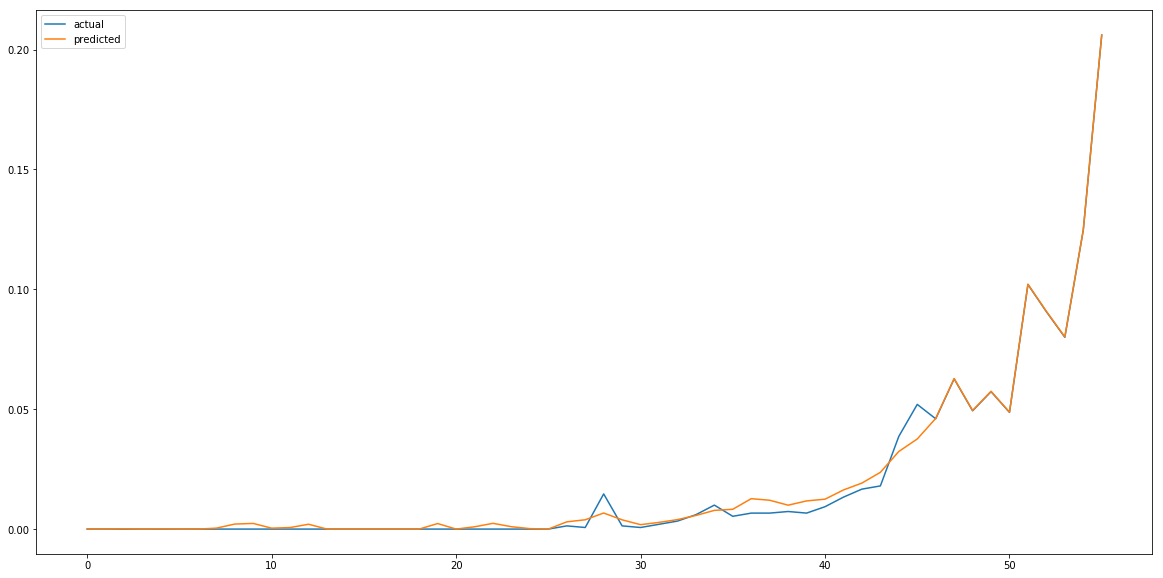

In [130]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pandas import DataFrame

def is_correct(value1, value2):
    correctness = False
    if value1 == value2:
        correctness = True
    elif abs(value1 - value2) <= 5:
        correctness = True
    elif value2 != 0 and value1/value2 <= 1.5 and value1/value2 >= (5/8):
        correctness = True
    return correctness

y_pred = model.predict(test_X, batch_size=batch_size)
i = 0

comparision_data = DataFrame()
correct = 0
total = 0
for x,y,actual in zip(test_X, y_pred,test_y):
    comparision_data.at[i,'Day']=i
    if y[0] < 0.0:
        y[0] = 0.0
    comparision_data.at[i,'Predicted'] = round(y[0]*1500)
    comparision_data.at[i,'Actual'] = (actual*1500)
    comparision_data.at[i,'State'] = 'Incorrect'
    if  is_correct(comparision_data.at[i,'Predicted'], comparision_data.at[i,'Actual']):
        correct+=1
        comparision_data.at[i,'State'] = 'Correct'
    total+=1
    i+=1

print(comparision_data)
print(correct/total)
plt.figure(figsize=(20,10))
#plt.plot(scaler.inverse_transform(scaled))
plt.plot(test_y,label='actual')
plt.plot(y_pred,label='predicted')
plt.legend()
plt.show()

In [133]:
# Test for April 1-15
df_test = pd.read_csv('../Timeseries-Data/test_data.csv')
columns_to_keep = ['Date','Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df_test = df_test.astype({"Population_Density":float ,"Lockdown": float,'Num_Cases':float,'Min_Temp':float,'Max_Temp':float})
df_test = df_test[columns_to_keep]

i=0
prev = 0.0
for ind in reversed(df_test.index):
    df_test.at[ind,'Min_Temp'] = (df_test.at[ind,'Min_Temp'] - temp_num)/temp_deno
    df_test.at[ind,'Max_Temp'] = (df_test.at[ind,'Max_Temp'] - temp_num)/temp_deno
    df_test.at[ind,'Lockdown'] = 1.0
    if ind != 0:
        df_test.at[ind,'Num_Cases'] -= df_test.at[ind-1,'Num_Cases']
df_test.at[0,'Num_Cases'] = 86
df_test['Num_Cases'] /= 1500

df_test = df_test.set_index('Date')

df_test

,Population_Density,Min_Temp,Max_Temp,Lockdown,Num_Cases
Date,,,,,
3/25/2020,1.0,0.687500,0.875000,1.0,0.057333
3/26/2020,1.0,0.687500,0.833333,1.0,0.048667
3/27/2020,1.0,0.625000,0.708333,1.0,0.102000
3/28/2020,1.0,0.625000,0.833333,1.0,0.090667
3/29/2020,1.0,0.687500,0.833333,1.0,0.080000
3/30/2020,1.0,0.687500,0.833333,1.0,0.124667
3/31/2020,1.0,0.666667,0.854167,1.0,0.206000
4/1/2020,1.0,0.541667,0.770833,1.0,0.282667
4/2/2020,1.0,0.583333,0.791667,1.0,0.324000


In [135]:
columns_input = ['Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df_testing = df_test
from pandas import DataFrame
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

new_df_test = series_to_supervised(df_testing,7,1,True)
# new_df.drop(new_df.columns[[-2,-3,-4,-5]], axis=1, inplace=True)
new_df_test

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
Date,,,,,,,,,,,,,,,,,,,,,
4/1/2020,1.0,0.687500,0.875000,1.0,0.057333,1.0,0.687500,0.833333,1.0,0.048667,...,1.0,0.666667,0.854167,1.0,0.206000,1.0,0.541667,0.770833,1.0,0.282667
4/2/2020,1.0,0.687500,0.833333,1.0,0.048667,1.0,0.625000,0.708333,1.0,0.102000,...,1.0,0.541667,0.770833,1.0,0.282667,1.0,0.583333,0.791667,1.0,0.324000
4/3/2020,1.0,0.625000,0.708333,1.0,0.102000,1.0,0.625000,0.833333,1.0,0.090667,...,1.0,0.583333,0.791667,1.0,0.324000,1.0,0.625000,0.791667,1.0,0.373333
4/4/2020,1.0,0.625000,0.833333,1.0,0.090667,1.0,0.687500,0.833333,1.0,0.080000,...,1.0,0.625000,0.791667,1.0,0.373333,1.0,0.625000,0.770833,1.0,0.386000
4/5/2020,1.0,0.687500,0.833333,1.0,0.080000,1.0,0.687500,0.833333,1.0,0.124667,...,1.0,0.625000,0.770833,1.0,0.386000,1.0,0.562500,0.770833,1.0,0.403333
4/6/2020,1.0,0.687500,0.833333,1.0,0.124667,1.0,0.666667,0.854167,1.0,0.206000,...,1.0,0.562500,0.770833,1.0,0.403333,1.0,0.416667,0.625000,1.0,0.326000
4/7/2020,1.0,0.666667,0.854167,1.0,0.206000,1.0,0.541667,0.770833,1.0,0.282667,...,1.0,0.416667,0.625000,1.0,0.326000,1.0,0.479167,0.645833,1.0,0.382000
4/8/2020,1.0,0.541667,0.770833,1.0,0.282667,1.0,0.583333,0.791667,1.0,0.324000,...,1.0,0.479167,0.645833,1.0,0.382000,1.0,0.604167,0.729167,1.0,0.376667
4/9/2020,1.0,0.583333,0.791667,1.0,0.324000,1.0,0.625000,0.791667,1.0,0.373333,...,1.0,0.604167,0.729167,1.0,0.376667,1.0,0.562500,0.729167,1.0,0.542000


         Day  Predicted  Actual      State
0    1 April      315.0   424.0    Correct
1    2 April      425.0   486.0    Correct
2    3 April      553.0   560.0    Correct
3    4 April      745.0   579.0    Correct
4    5 April     1011.0   605.0  Incorrect
5    6 April     1163.0   489.0  Incorrect
6    7 April     1255.0   573.0  Incorrect
7    8 April     1242.0   565.0  Incorrect
8    9 April     1340.0   813.0  Incorrect
9   10 April     1494.0   871.0  Incorrect
10  11 April     1651.0   854.0  Incorrect
11  12 April     1748.0     0.0  Incorrect
12  13 April     1790.0   546.0  Incorrect
13  14 April     1458.0  1000.0    Correct
14  15 April     1506.0  1000.0  Incorrect
0.3333333333333333


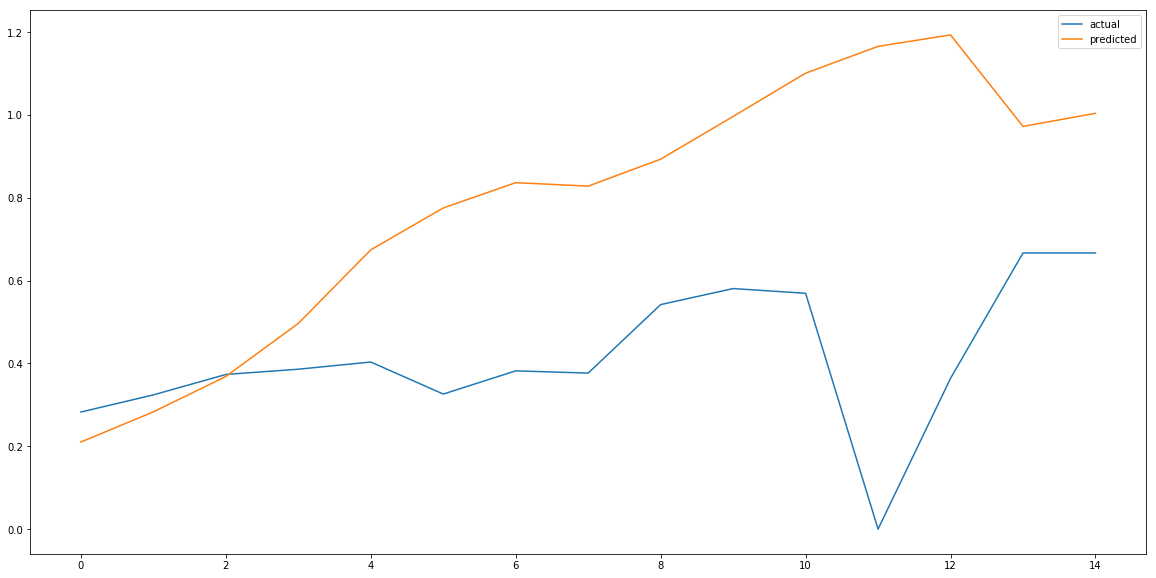

In [136]:
values = new_df_test.values
test_x, test_y = values[:, :-1], values[:, -1]
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
y_pred = model.predict(test_X, batch_size=batch_size)
i = 0

comparision_data = DataFrame()
correct = 0
total = 0
for x,y,actual in zip(test_X, y_pred,test_y):
    comparision_data.at[i,'Day']=str(i+1)+' April'
    if y[0] < 0.0:
        y[0] = 0.0
    comparision_data.at[i,'Predicted'] = round(y[0]*1500)
    comparision_data.at[i,'Actual'] = actual*1500
    comparision_data.at[i,'State'] = 'Incorrect'
    if is_correct(comparision_data.at[i,'Predicted'],comparision_data.at[i,'Actual']):
        correct+=1
        comparision_data.at[i,'State'] = 'Correct'
    total+=1
    i+=1

print(comparision_data)
print(correct/total)
plt.figure(figsize=(20,10))
#plt.plot(scaler.inverse_transform(scaled))
plt.plot(test_y,label='actual')
plt.plot(y_pred,label='predicted')
plt.legend()
plt.show()